## **Startup Success Prediction Model**


#### **Problem Statement**

Startup is a business that has just been established and grown supported by digital services and has also become an important element of innovation systems and economies around the world. The Startup ecosystem is growing very rapidly and still needs a lot of funding to operate with a minimalist working group. So it is very important for VC to monitor the performance and performance of Startup, so that it can be used as a consideration to decide whether to fund a Startup to drive its growth or refuse to take part in funding. To monitor startup performance, it is important to analyze what makes a Startup successful and how to determine its success.

#### **Goals**
The goal to be achieved is to determine whether a StartUp will be successful or not.



##### **Objective**
The objective is to analyze startup behavior based on several variables, determine what variables affect startup success the most, then build a model that can predict the success of a StartUp.

### **Data Exploration**

#### **Import Libraries**

In [372]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date
from scipy import stats
from scipy.stats import norm, skew # for some statistics

import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.colors import n_colors
from plotly.subplots import make_subplots

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)
sns.set()

#### **Load Dataset**

In [ ]:
df=pd.read_csv('data/startup data.csv')

In [374]:
df.head()

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,labels,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,state_code.1,is_CA,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,NaN,Bandsintown,1,1/1/2007,NaN,4/1/2009,1/1/2010,2.2493,3.0027,4.6685,6.7041,3,3,375000,3,CA,1,0,0,0,0,music,0,0,0,0,0,0,0,0,0,1,c:6669,0,1,0,0,0,0,1.0000,0,acquired
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,NaN,TriCipher,1,1/1/2000,NaN,2/14/2005,12/28/2009,5.1260,9.9973,7.0055,7.0055,9,4,40100000,1,CA,1,0,0,0,0,enterprise,0,0,0,1,0,0,0,0,0,0,c:16283,1,0,0,1,1,1,4.7500,1,acquired
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,1,3/18/2009,NaN,3/30/2010,3/30/2010,1.0329,1.0329,1.4575,2.2055,5,1,2600000,2,CA,1,0,0,0,0,web,0,1,0,0,0,0,0,0,0,0,c:65620,0,0,1,0,0,0,4.0000,1,acquired
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,1,1/1/2002,NaN,2/17/2005,4/25/2007,3.1315,5.3151,6.0027,6.0027,5,3,40000000,1,CA,1,0,0,0,0,software,1,0,0,0,0,0,0,0,0,0,c:42668,0,0,0,1,1,1,3.3333,1,acquired
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,0,8/1/2010,10/1/2012,8/1/2010,4/1/2012,0.0000,1.6685,0.0384,0.0384,2,2,1300000,1,CA,1,0,0,0,0,games_video,0,0,0,0,0,1,0,0,0,0,c:65806,1,1,0,0,0,0,1.0000,1,closed


#### **Description**

In [375]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923 entries, 0 to 922
Data columns (total 49 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                923 non-null    int64  
 1   state_code                923 non-null    object 
 2   latitude                  923 non-null    float64
 3   longitude                 923 non-null    float64
 4   zip_code                  923 non-null    object 
 5   id                        923 non-null    object 
 6   city                      923 non-null    object 
 7   Unnamed: 6                430 non-null    object 
 8   name                      923 non-null    object 
 9   labels                    923 non-null    int64  
 10  founded_at                923 non-null    object 
 11  closed_at                 335 non-null    object 
 12  first_funding_at          923 non-null    object 
 13  last_funding_at           923 non-null    object 
 14  age_first_

#### **Data type identification**

In [376]:
df.columns

Index(['Unnamed: 0', 'state_code', 'latitude', 'longitude', 'zip_code', 'id',
       'city', 'Unnamed: 6', 'name', 'labels', 'founded_at', 'closed_at',
       'first_funding_at', 'last_funding_at', 'age_first_funding_year',
       'age_last_funding_year', 'age_first_milestone_year',
       'age_last_milestone_year', 'relationships', 'funding_rounds',
       'funding_total_usd', 'milestones', 'state_code.1', 'is_CA', 'is_NY',
       'is_MA', 'is_TX', 'is_otherstate', 'category_code', 'is_software',
       'is_web', 'is_mobile', 'is_enterprise', 'is_advertising',
       'is_gamesvideo', 'is_ecommerce', 'is_biotech', 'is_consulting',
       'is_othercategory', 'object_id', 'has_VC', 'has_angel', 'has_roundA',
       'has_roundB', 'has_roundC', 'has_roundD', 'avg_participants',
       'is_top500', 'status'],
      dtype='object')

### **Data Preprocessing and cleaning**

##### **Check Duplicates**

In [377]:
duplicate = df[df.duplicated()] 
  
print("Duplicate Rows :")

Duplicate Rows :


#### **Splitting all Date Columns into Day, Month, and Year**

In [378]:
date_columns=['founded_at','closed_at','first_funding_at','last_funding_at']
for col in date_columns:
    df[col+'_month']=df[col].str.split('/').str[0]
    df[col+'_day']=df[col].str.split('/').str[1]
    df[col+'_year']=df[col].str.split('/').str[2]

#### **Converting these columns to numeric**

In [379]:
day_columns=['founded_at_day','closed_at_day','first_funding_at_day','last_funding_at_day']
month_columns=['founded_at_month','closed_at_month','first_funding_at_month','last_funding_at_month']
year_columns=['founded_at_year','closed_at_year','first_funding_at_year','last_funding_at_year']
for col in day_columns+month_columns+year_columns:
    df[col]=pd.to_numeric(df[col], errors='coerce')



##### **Checking Negative values**

In [380]:
age=["age_first_funding_year","age_last_funding_year","age_first_milestone_year","age_last_milestone_year"]

for a in range(len(age)):
    print("Is there any negative value in '{}' column  : {} ".format(age[a],(df[age[a]]<0).any()))

Is there any negative value in 'age_first_funding_year' column  : True 
Is there any negative value in 'age_last_funding_year' column  : True 
Is there any negative value in 'age_first_milestone_year' column  : True 
Is there any negative value in 'age_last_milestone_year' column  : True 


##### Dropping Negative values 

In [381]:
df=df.drop(df[df.age_first_funding_year<0].index)
df=df.drop(df[df.age_last_funding_year<0].index)
df=df.drop(df[df.age_first_milestone_year<0].index)
df=df.drop(df[df.age_last_milestone_year<0].index)

In [382]:
for a in range(len(age)):
    print("Is there any negative value in '{}' column  : {} ".format(age[a],(df[age[a]]<0).any()))

Is there any negative value in 'age_first_funding_year' column  : False 
Is there any negative value in 'age_last_funding_year' column  : False 
Is there any negative value in 'age_first_milestone_year' column  : False 
Is there any negative value in 'age_last_milestone_year' column  : False 


##### **Dropping columns : 'founded_at','closed_at','first_funding_at'and 'last_funding_at'**

In [383]:
df.drop(columns=['founded_at','closed_at','first_funding_at','last_funding_at'], inplace=True)

In [384]:
df.head()

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,labels,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,state_code.1,is_CA,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status,founded_at_month,founded_at_day,founded_at_year,closed_at_month,closed_at_day,closed_at_year,first_funding_at_month,first_funding_at_day,first_funding_at_year,last_funding_at_month,last_funding_at_day,last_funding_at_year
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,NaN,Bandsintown,1,2.2493,3.0027,4.6685,6.7041,3,3,375000,3,CA,1,0,0,0,0,music,0,0,0,0,0,0,0,0,0,1,c:6669,0,1,0,0,0,0,1.0000,0,acquired,1,1,2007,NaN,NaN,NaN,4,1,2009,1,1,2010
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,NaN,TriCipher,1,5.1260,9.9973,7.0055,7.0055,9,4,40100000,1,CA,1,0,0,0,0,enterprise,0,0,0,1,0,0,0,0,0,0,c:16283,1,0,0,1,1,1,4.7500,1,acquired,1,1,2000,NaN,NaN,NaN,2,14,2005,12,28,2009
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,1,1.0329,1.0329,1.4575,2.2055,5,1,2600000,2,CA,1,0,0,0,0,web,0,1,0,0,0,0,0,0,0,0,c:65620,0,0,1,0,0,0,4.0000,1,acquired,3,18,2009,NaN,NaN,NaN,3,30,2010,3,30,2010
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,1,3.1315,5.3151,6.0027,6.0027,5,3,40000000,1,CA,1,0,0,0,0,software,1,0,0,0,0,0,0,0,0,0,c:42668,0,0,0,1,1,1,3.3333,1,acquired,1,1,2002,NaN,NaN,NaN,2,17,2005,4,25,2007
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,0,0.0000,1.6685,0.0384,0.0384,2,2,1300000,1,CA,1,0,0,0,0,games_video,0,0,0,0,0,1,0,0,0,0,c:65806,1,1,0,0,0,0,1.0000,1,closed,8,1,2010,10.0,1.0,2012.0,8,1,2010,4,1,2012


#### **Defining Numeric and Categorical Columns**

In [385]:

numeric_features= [feature for feature in df.columns if df[feature].dtype !='O']
categorical_features= [feature for feature in df.columns if df[feature].dtype =='O']

#print columns 
print("Number of Numerical features is {} which are : {} ".format(len(numeric_features),numeric_features))
print("Number of Categorical features is {} which are : {} ".format(len(categorical_features),categorical_features))

Number of Numerical features is 47 which are : ['Unnamed: 0', 'latitude', 'longitude', 'labels', 'age_first_funding_year', 'age_last_funding_year', 'age_first_milestone_year', 'age_last_milestone_year', 'relationships', 'funding_rounds', 'funding_total_usd', 'milestones', 'is_CA', 'is_NY', 'is_MA', 'is_TX', 'is_otherstate', 'is_software', 'is_web', 'is_mobile', 'is_enterprise', 'is_advertising', 'is_gamesvideo', 'is_ecommerce', 'is_biotech', 'is_consulting', 'is_othercategory', 'has_VC', 'has_angel', 'has_roundA', 'has_roundB', 'has_roundC', 'has_roundD', 'avg_participants', 'is_top500', 'founded_at_month', 'founded_at_day', 'founded_at_year', 'closed_at_month', 'closed_at_day', 'closed_at_year', 'first_funding_at_month', 'first_funding_at_day', 'first_funding_at_year', 'last_funding_at_month', 'last_funding_at_day', 'last_funding_at_year'] 
Number of Categorical features is 10 which are : ['state_code', 'zip_code', 'id', 'city', 'Unnamed: 6', 'name', 'state_code.1', 'category_code', '

#### **Numeric Data**

In [386]:
numeric_df = df.select_dtypes(include='number')
numeric_df.head()


,Unnamed: 0,latitude,longitude,labels,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,is_MA,is_TX,is_otherstate,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,founded_at_month,founded_at_day,founded_at_year,closed_at_month,closed_at_day,closed_at_year,first_funding_at_month,first_funding_at_day,first_funding_at_year,last_funding_at_month,last_funding_at_day,last_funding_at_year
0,1005,42.358880,-71.056820,1,2.2493,3.0027,4.6685,6.7041,3,3,375000,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1.0000,0,1,1,2007,NaN,NaN,NaN,4,1,2009,1,1,2010
1,204,37.238916,-121.973718,1,5.1260,9.9973,7.0055,7.0055,9,4,40100000,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,1,4.7500,1,1,1,2000,NaN,NaN,NaN,2,14,2005,12,28,2009
2,1001,32.901049,-117.192656,1,1.0329,1.0329,1.4575,2.2055,5,1,2600000,2,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,4.0000,1,3,18,2009,NaN,NaN,NaN,3,30,2010,3,30,2010
3,738,37.320309,-122.050040,1,3.1315,5.3151,6.0027,6.0027,5,3,40000000,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,3.3333,1,1,1,2002,NaN,NaN,NaN,2,17,2005,4,25,2007
4,1002,37.779281,-122.419236,0,0.0000,1.6685,0.0384,0.0384,2,2,1300000,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1.0000,1,8,1,2010,10.0,1.0,2012.0,8,1,2010,4,1,2012


#### **Categorical Data**

In [387]:
categorical_df = df.select_dtypes(include='object')
categorical_df.head()


,state_code,zip_code,id,city,Unnamed: 6,name,state_code.1,category_code,object_id,status
0,CA,92101,c:6669,San Diego,NaN,Bandsintown,CA,music,c:6669,acquired
1,CA,95032,c:16283,Los Gatos,NaN,TriCipher,CA,enterprise,c:16283,acquired
2,CA,92121,c:65620,San Diego,San Diego CA 92121,Plixi,CA,web,c:65620,acquired
3,CA,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,CA,software,c:42668,acquired
4,CA,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,CA,games_video,c:65806,closed


##### **Checking Similarity between state_code and state_code.1**	

In [388]:
for index, row in df.iterrows():
    if row['state_code']!=row['state_code.1']:
        print(index, row['state_code'], row['state_code.1'])

515 CA nan


It is observed that only one index of state_code and state_code.1 is different. This means both columns indicate same value hence drop state_code.1.

In [389]:
df.head()

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,labels,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,state_code.1,is_CA,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status,founded_at_month,founded_at_day,founded_at_year,closed_at_month,closed_at_day,closed_at_year,first_funding_at_month,first_funding_at_day,first_funding_at_year,last_funding_at_month,last_funding_at_day,last_funding_at_year
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,NaN,Bandsintown,1,2.2493,3.0027,4.6685,6.7041,3,3,375000,3,CA,1,0,0,0,0,music,0,0,0,0,0,0,0,0,0,1,c:6669,0,1,0,0,0,0,1.0000,0,acquired,1,1,2007,NaN,NaN,NaN,4,1,2009,1,1,2010
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,NaN,TriCipher,1,5.1260,9.9973,7.0055,7.0055,9,4,40100000,1,CA,1,0,0,0,0,enterprise,0,0,0,1,0,0,0,0,0,0,c:16283,1,0,0,1,1,1,4.7500,1,acquired,1,1,2000,NaN,NaN,NaN,2,14,2005,12,28,2009
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,1,1.0329,1.0329,1.4575,2.2055,5,1,2600000,2,CA,1,0,0,0,0,web,0,1,0,0,0,0,0,0,0,0,c:65620,0,0,1,0,0,0,4.0000,1,acquired,3,18,2009,NaN,NaN,NaN,3,30,2010,3,30,2010
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,1,3.1315,5.3151,6.0027,6.0027,5,3,40000000,1,CA,1,0,0,0,0,software,1,0,0,0,0,0,0,0,0,0,c:42668,0,0,0,1,1,1,3.3333,1,acquired,1,1,2002,NaN,NaN,NaN,2,17,2005,4,25,2007
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,0,0.0000,1.6685,0.0384,0.0384,2,2,1300000,1,CA,1,0,0,0,0,games_video,0,0,0,0,0,1,0,0,0,0,c:65806,1,1,0,0,0,0,1.0000,1,closed,8,1,2010,10.0,1.0,2012.0,8,1,2010,4,1,2012


In [390]:
df['state_code'].unique()

array(['CA', 'MA', 'KY', 'NY', 'CO', 'VA', 'TX', 'WA', 'IL', 'PA', 'GA',
       'NH', 'MO', 'FL', 'NJ', 'WV', 'MI', 'DC', 'CT', 'NC', 'MD', 'OH',
       'TN', 'MN', 'RI', 'ME', 'NV', 'OR', 'UT', 'NM', 'IN', 'AZ', 'ID',
       'AR', 'WI'], dtype=object)

#### **Dropping state_code.1**

In [391]:
df.drop(columns=['state_code.1'],inplace=True)

#### **Changing 'status' data value**

In [392]:
categorical_df['status'].unique()

array(['acquired', 'closed'], dtype=object)

In [393]:
df['status'] = df.status.map({'acquired':1, 'closed':0})

In [394]:
df['status'].astype(int)

0      1
1      1
2      1
3      1
4      0
5      0
6      1
7      1
8      1
9      1
10     1
12     0
13     1
14     1
15     0
16     0
18     1
19     0
20     1
21     0
22     0
24     0
25     1
26     1
27     1
28     1
29     1
30     0
31     1
33     1
34     0
35     0
36     0
37     0
38     1
39     1
40     1
41     1
42     0
43     1
44     1
45     1
46     1
47     1
48     1
49     1
50     1
51     1
52     1
53     1
54     1
55     0
56     1
57     1
58     1
59     1
61     0
62     1
63     0
64     1
65     1
66     0
67     1
68     1
69     1
70     1
72     1
73     1
74     0
75     0
76     0
77     1
78     1
81     0
82     0
83     1
84     1
85     0
86     1
87     0
88     0
89     1
90     1
91     0
92     1
93     1
94     1
95     0
96     1
97     0
98     1
99     0
100    0
101    1
102    1
103    1
105    0
106    1
107    0
108    1
109    0
110    1
111    1
112    0
113    1
114    0
115    1
116    0
117    1
118    1
119    1
1

In [395]:
## Checking similarity between labels and status 
for index, row in df.iterrows():
    if row['labels']!=row['status']:
        print(index, row['labels'], row['status'])

This shows that there are no rows where 'labels' and 'status' are different.

#### **Dropping Labels**

In [396]:
df.drop(columns=['labels'],inplace=True)

#### **Dropping column Unnamed: 6**
* As it is duplicate information, merged into a single string , which are already present as columns 'city','state_code'and'state_code'.

In [397]:
df.drop(columns=['Unnamed: 6'], inplace=True)

In [398]:
df.head()

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,name,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status,founded_at_month,founded_at_day,founded_at_year,closed_at_month,closed_at_day,closed_at_year,first_funding_at_month,first_funding_at_day,first_funding_at_year,last_funding_at_month,last_funding_at_day,last_funding_at_year
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,Bandsintown,2.2493,3.0027,4.6685,6.7041,3,3,375000,3,1,0,0,0,0,music,0,0,0,0,0,0,0,0,0,1,c:6669,0,1,0,0,0,0,1.0000,0,1,1,1,2007,NaN,NaN,NaN,4,1,2009,1,1,2010
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,TriCipher,5.1260,9.9973,7.0055,7.0055,9,4,40100000,1,1,0,0,0,0,enterprise,0,0,0,1,0,0,0,0,0,0,c:16283,1,0,0,1,1,1,4.7500,1,1,1,1,2000,NaN,NaN,NaN,2,14,2005,12,28,2009
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,Plixi,1.0329,1.0329,1.4575,2.2055,5,1,2600000,2,1,0,0,0,0,web,0,1,0,0,0,0,0,0,0,0,c:65620,0,0,1,0,0,0,4.0000,1,1,3,18,2009,NaN,NaN,NaN,3,30,2010,3,30,2010
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Solidcore Systems,3.1315,5.3151,6.0027,6.0027,5,3,40000000,1,1,0,0,0,0,software,1,0,0,0,0,0,0,0,0,0,c:42668,0,0,0,1,1,1,3.3333,1,1,1,1,2002,NaN,NaN,NaN,2,17,2005,4,25,2007
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,Inhale Digital,0.0000,1.6685,0.0384,0.0384,2,2,1300000,1,1,0,0,0,0,games_video,0,0,0,0,0,1,0,0,0,0,c:65806,1,1,0,0,0,0,1.0000,1,0,8,1,2010,10.0,1.0,2012.0,8,1,2010,4,1,2012


#### **Handling Missing Values**

In [399]:
#Number of missing values in each column
null=pd.DataFrame(df.isnull().sum(),columns=['Null Count'])
null = null[null['Null Count'] > 0]
null["% Missing Values"]=(df.isna().sum()/len(df)*100)
null

,Null Count,% Missing Values
age_first_milestone_year,144,17.142857
age_last_milestone_year,144,17.142857
closed_at_month,544,64.761905
closed_at_day,544,64.761905
closed_at_year,544,64.761905


In [400]:
total_missing = df.isnull().sum().sum()
print("Total missing values:", total_missing)


Total missing values: 1920


* **Analysis results in the dataset used there are Missing Values among them are**
* **Total Missing Values is 1920**
* Columns that have more than 50% of missing values
  * Variable 'closed_at_day' with a total percentage of 64.76% or a total of 544 columns.
  * Variable 'closed_at_month' with a total percentage of 64.76% or a total of 544 columns.
  * Variable 'closed_at_year' with a total percentage of 64.76% or a total of 544 columns.
* Columns that have less than 50% of missing values
   * Variable 'age_first_milestone_year' with a total percentage of 17.142% or a total of 144 columns.
   * Variable 'age_last_milestone_year' with a total percentage of 17.142% or a total of 144 columns.

##### **Handling missing values for age_first_milestone_year and age_last_milestone_year**

In [401]:
mean_value = df["age_first_funding_year"].mean()
median_value = df["age_first_funding_year"].median()

print("Mean:", mean_value)
print("Median:", median_value)


Mean: 2.4234428571428572
Median: 1.6562000000000001


In [402]:
df[['age_first_milestone_year','age_last_milestone_year','milestones']].head()

,age_first_milestone_year,age_last_milestone_year,milestones
0,4.6685,6.7041,3
1,7.0055,7.0055,1
2,1.4575,2.2055,2
3,6.0027,6.0027,1
4,0.0384,0.0384,1


In [403]:
# Group by milestones and count NaNs in both columns
missing_by_milestone = df.groupby('milestones')[['age_first_milestone_year', 'age_last_milestone_year']].apply(lambda x: x.isna().sum())

missing_by_milestone


,age_first_milestone_year,age_last_milestone_year
milestones,,
0,144,144
1,0,0
2,0,0
3,0,0
4,0,0
5,0,0
6,0,0
8,0,0


Based on the results of the analysis obtained that the columns 'age_first_milestone_year' and 'age_last_milestone_year' have null values because the startup does not have milestones. this can be confirmed by looking at the 'milestones' column containing the data 0 must be accompanied by the null 'age_first_milestone_year' and 'age_last_milestone_year' columns. so we decided to fill that null column with a value of 0.

In [404]:
df['age_first_milestone_year'] = df['age_first_milestone_year'].fillna(0)
df['age_last_milestone_year'] = df['age_last_milestone_year'].fillna(0)


#### **Handling missing values for closed_at_day, closed_at_month, closed_at_year**

*  **Analysis results in the columns,'closed_at_day','closed_at_month' and 'closed_at_day' containing Missing Values among them are**
  * Column "closed_at_day" is a column where StartUp "Closed" so that the empty data should be a StarUp whose status is still "Acquired"
  * Column "closed_at_month" is a column where StartUp "Closed" so that the empty data should be a StarUp whose status is still "Acquired"
  * Column "closed_at_year" is a column where StartUp "Closed" so that the empty data should be a StarUp whose status is still "Acquired"

In [405]:
df.loc[df['status'] == 1, 'closed_at_day'] = df.loc[df['status'] == 1, 'closed_at_day'].fillna(0)
df.loc[df['status'] == 1, 'closed_at_month'] = df.loc[df['status'] == 1, 'closed_at_month'].fillna(0)
df.loc[df['status'] == 1, 'closed_at_year'] = df.loc[df['status'] == 1, 'closed_at_year'].fillna(0)

### **Exploratory Data Analysis**

##### **Numerical Approach**

#### Statistical Summary

In [406]:
numeric_df.describe()

,Unnamed: 0,latitude,longitude,labels,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,is_MA,is_TX,is_otherstate,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,founded_at_month,founded_at_day,founded_at_year,closed_at_month,closed_at_day,closed_at_year,first_funding_at_month,first_funding_at_day,first_funding_at_year,last_funding_at_month,last_funding_at_day,last_funding_at_year
count,840.000000,840.000000,840.000000,840.000000,840.000000,840.000000,696.000000,696.000000,840.000000,840.000000,8.400000e+02,840.000000,840.000000,840.000000,840.000000,840.000000,840.000000,840.000000,840.000000,840.000000,840.000000,840.000000,840.000000,840.000000,840.000000,840.000000,840.000000,840.000000,840.000000,840.000000,840.000000,840.000000,840.000000,840.000000,840.000000,840.000000,840.000000,840.000000,296.000000,296.000000,296.000000,840.000000,840.000000,840.000000,840.000000,840.000000,840.000000
mean,570.323810,38.410522,-103.766293,0.657143,2.423443,4.129826,3.385562,4.981467,7.752381,2.320238,2.708135e+07,1.820238,0.532143,0.114286,0.088095,0.046429,0.217857,0.173810,0.146429,0.080952,0.076190,0.069048,0.054762,0.028571,0.039286,0.003571,0.327381,0.329762,0.230952,0.514286,0.407143,0.241667,0.105952,2.896645,0.827381,3.090476,2.260714,2005.304762,5.459459,7.858108,2011.344595,6.185714,10.291667,2007.447619,6.191667,13.363095,2009.144048
std,333.965519,3.689577,21.862099,0.474947,2.495400,2.937524,2.794721,3.118862,7.280069,1.404427,1.986852e+08,1.326298,0.499263,0.318348,0.283602,0.210537,0.413036,0.379171,0.353746,0.272924,0.265461,0.253686,0.227650,0.166698,0.194390,0.059690,0.469537,0.470407,0.421693,0.500094,0.491595,0.428348,0.307960,1.907636,0.378143,3.295376,4.661600,3.541678,3.457006,9.167008,1.759094,3.598276,9.896577,2.286848,3.495978,9.635815,2.174610
min,1.000000,25.752358,-122.756956,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.100000e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1984.000000,1.000000,1.000000,2001.000000,1.000000,1.000000,2000.000000,1.000000,1.000000,2001.000000
25%,278.500000,37.386778,-122.187927,0.000000,0.681525,1.917800,1.252100,2.693150,3.000000,1.000000,3.274245e+06,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.500000,1.000000,1.000000,1.000000,2003.000000,2.000000,1.000000,2010.750000,3.000000,1.000000,2006.000000,3.000000,4.000000,2008.000000
50%,575.000000,37.779281,-118.355788,1.000000,1.656200,3.706800,2.910950,4.654800,5.500000,2.000000,1.053559e+07,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.500000,1.000000,1.000000,1.000000,2006.000000,6.000000,1.000000,2012.000000,6.000000,7.000000,2007.000000,6.000000,13.000000,2009.000000
75%,865.250000,40.730646,-77.381456,1.000000,3.756875,5.719200,5.002700,6.899975,10.000000,3.000000,2.562500e+07,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,5.000000,1.000000,2008.000000,8.000000,15.000000,2013.000000,9.000000,19.000000,2009.000000,9.000000,22.000000,2011.000000
max,1153.000000,59.335232,18.057121,1.000000,21.895900,21.895900,24.684900,24.684900,63.000000,10.000000,5.700000e+09,8.000000

In [407]:
categorical_df.describe()

,state_code,zip_code,id,city,Unnamed: 6,name,state_code.1,category_code,object_id,status
count,840,840,840,840,391,840,839,840,840,840
unique,35,359,839,210,232,839,35,35,839,2
top,CA,94107,c:28482,San Francisco,San Francisco CA 94105,Redwood Systems,CA,software,c:28482,acquired
freq,448,26,2,115,10,2,447,146,2,552


* Does the value listed on each column make sense?
* age_first_funding_year and age_last_funding_year have the same min,max data, need to be checked again
* Is the maximum/minimum value still within the reasonable limit?
* Min/max that is too far from the mean/median may be an indication of data input error
* Is there a column with a significant difference between the mean and the median?
* Differences between mean/median indicate outlier or skewed distribution

#### **Categorical value count**

In [408]:
categorical_df.value_counts()

state_code  zip_code    id        city                 Unnamed: 6                    name                              state_code.1  category_code     object_id  status  
AR          72201       c:35903   Little Rock          Little Rock AR 72201          JavaJobs                          AR            software          c:35903    closed      1
AZ          85284       c:42062   Tempe                Tempe AZ 85284                Andigilog                         AZ            semiconductor     c:42062    closed      1
CA          60606       c:46943   Chicago              Chicago CA 60606              Braintree                         CA            software          c:46943    acquired    1
            90015       c:23052   Los Angeles          Los Angeles CA 90015          HauteLook                         CA            fashion           c:23052    acquired    1
            90017       c:83176   Los Angeles          Los Angeles CA 90017          ItsGoinOn                         CA    

In [409]:
numeric_df.value_counts()

Unnamed: 0  latitude   longitude    labels  age_first_funding_year  age_last_funding_year  age_first_milestone_year  age_last_milestone_year  relationships  funding_rounds  funding_total_usd  milestones  is_CA  is_NY  is_MA  is_TX  is_otherstate  is_software  is_web  is_mobile  is_enterprise  is_advertising  is_gamesvideo  is_ecommerce  is_biotech  is_consulting  is_othercategory  has_VC  has_angel  has_roundA  has_roundB  has_roundC  has_roundD  avg_participants  is_top500  founded_at_month  founded_at_day  founded_at_year  closed_at_month  closed_at_day  closed_at_year  first_funding_at_month  first_funding_at_day  first_funding_at_year  last_funding_at_month  last_funding_at_day  last_funding_at_year
12          37.424298  -122.139809  0       0.6767                  1.4493                 0.0000                    0.0000                   2              2               21189              1           1      0      0      0      0              0            0       1          0       

#### **Graphical Analysis of Features**

##### **Correlation heatmap**

* To correlate between data variables.

Correlation is represented as a value between -1 and +1 where +1 indicates the highest positive correlation, -1 indicates the highest negative correlation, and 0 indicates no correlation.

In [410]:
df_numeric = df.select_dtypes(include=['int64', 'float64'])
correlation_matrix=df_numeric.corr()


(47.5, -0.5)

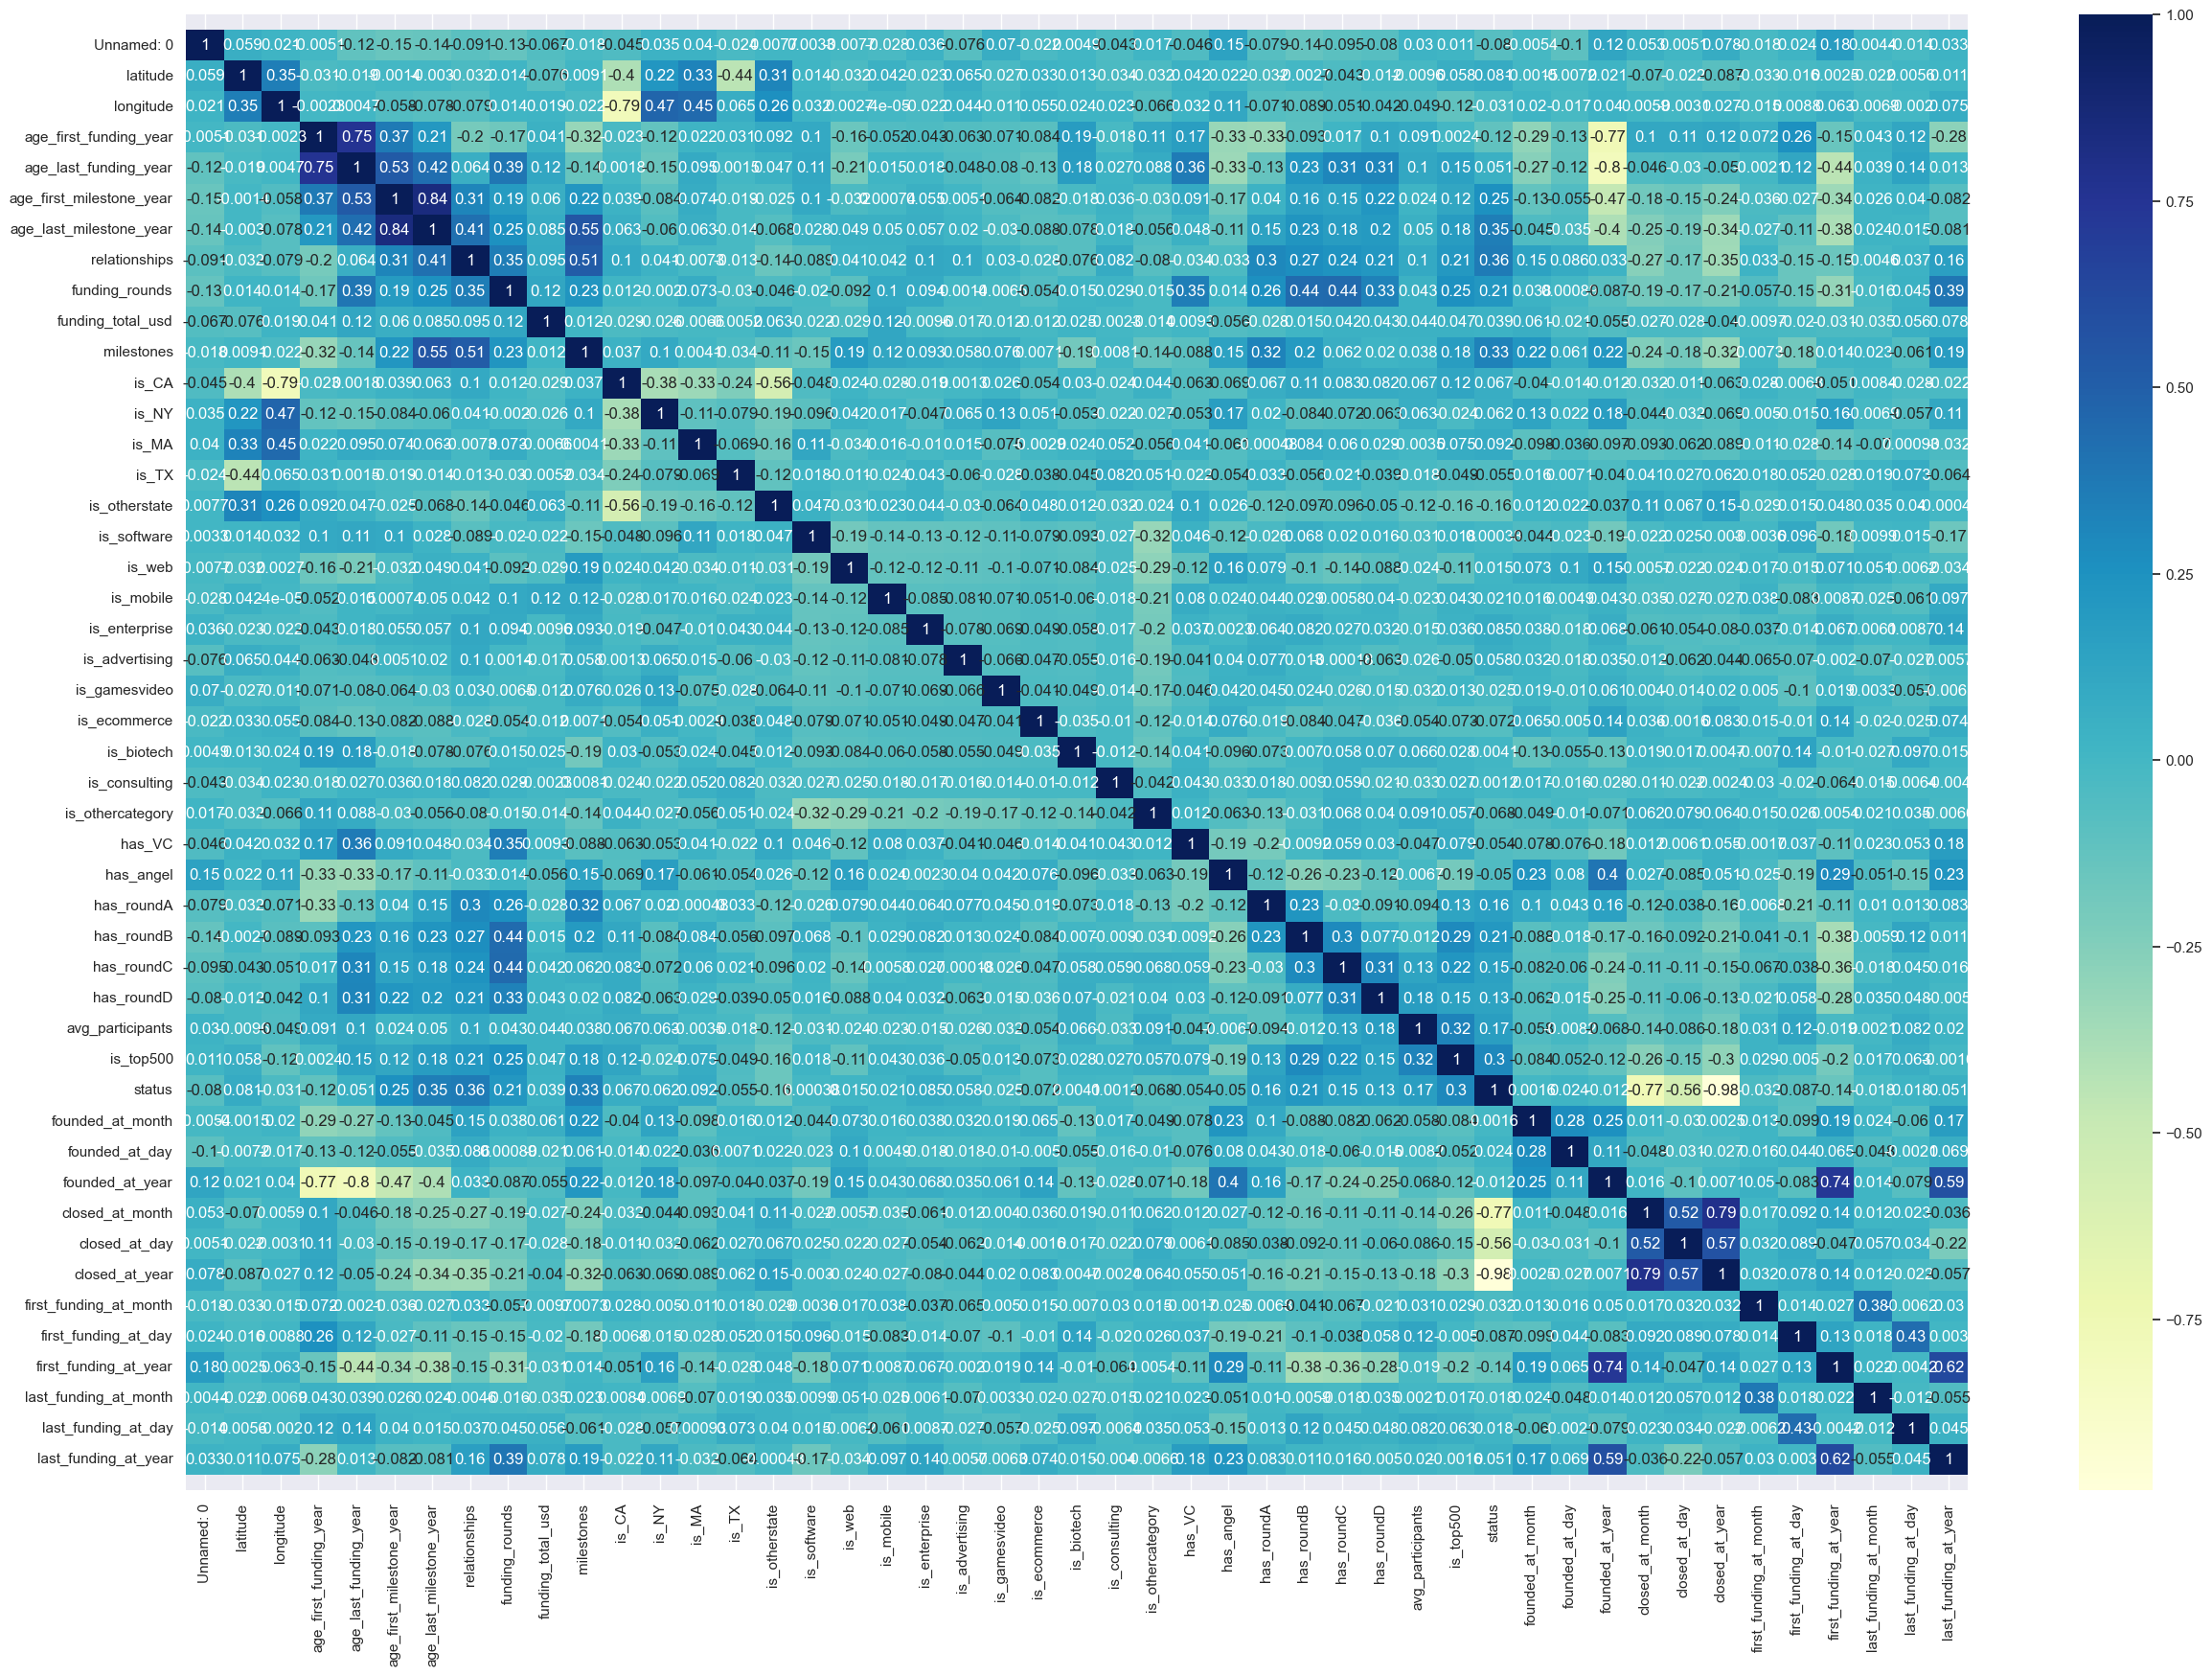

In [411]:
plt.figure(figsize=(30,20))
ax = sns.heatmap(data = correlation_matrix,cmap='YlGnBu',annot=True)

bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5,top - 0.5)

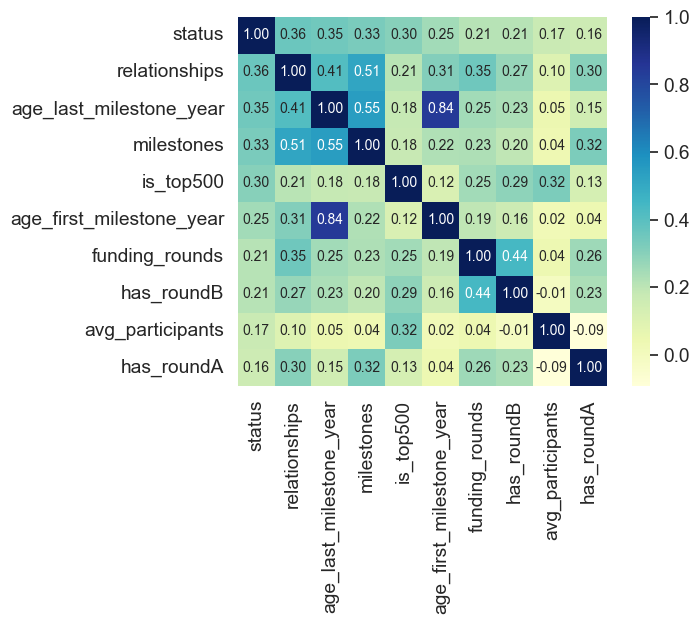

In [412]:
#number of variables for heatmap
cols = correlation_matrix.nlargest(10,'status')['status'].index
cm = np.corrcoef(df[cols].values.T) 
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, cmap='YlGnBu', fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

##### **Scatter plot**
Relationship Between First and Last Funding Year (Relative to Startup Age)

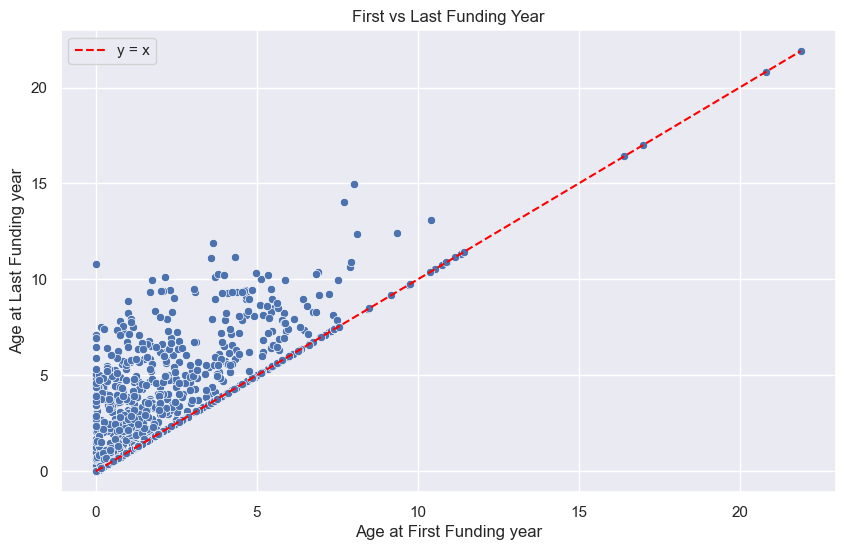

In [413]:

sns.set(style="darkgrid")
plt.figure(figsize=(10, 6))

sns.scatterplot(x="age_first_funding_year", y="age_last_funding_year", data=df)

plt.plot([0, df["age_first_funding_year"].max()],
         [0, df["age_first_funding_year"].max()],
         color='red', linestyle='--', label='y = x')

plt.legend()
plt.title("First vs Last Funding Year")
plt.xlabel("Age at First Funding year")
plt.ylabel("Age at Last Funding year")
plt.show()


It can be observed that 'age_first_milestones_year' and 'age_last_milestones_year' are really positively correlated whereas when one increases, the other also increases—mostly.

##### **Box Plot**

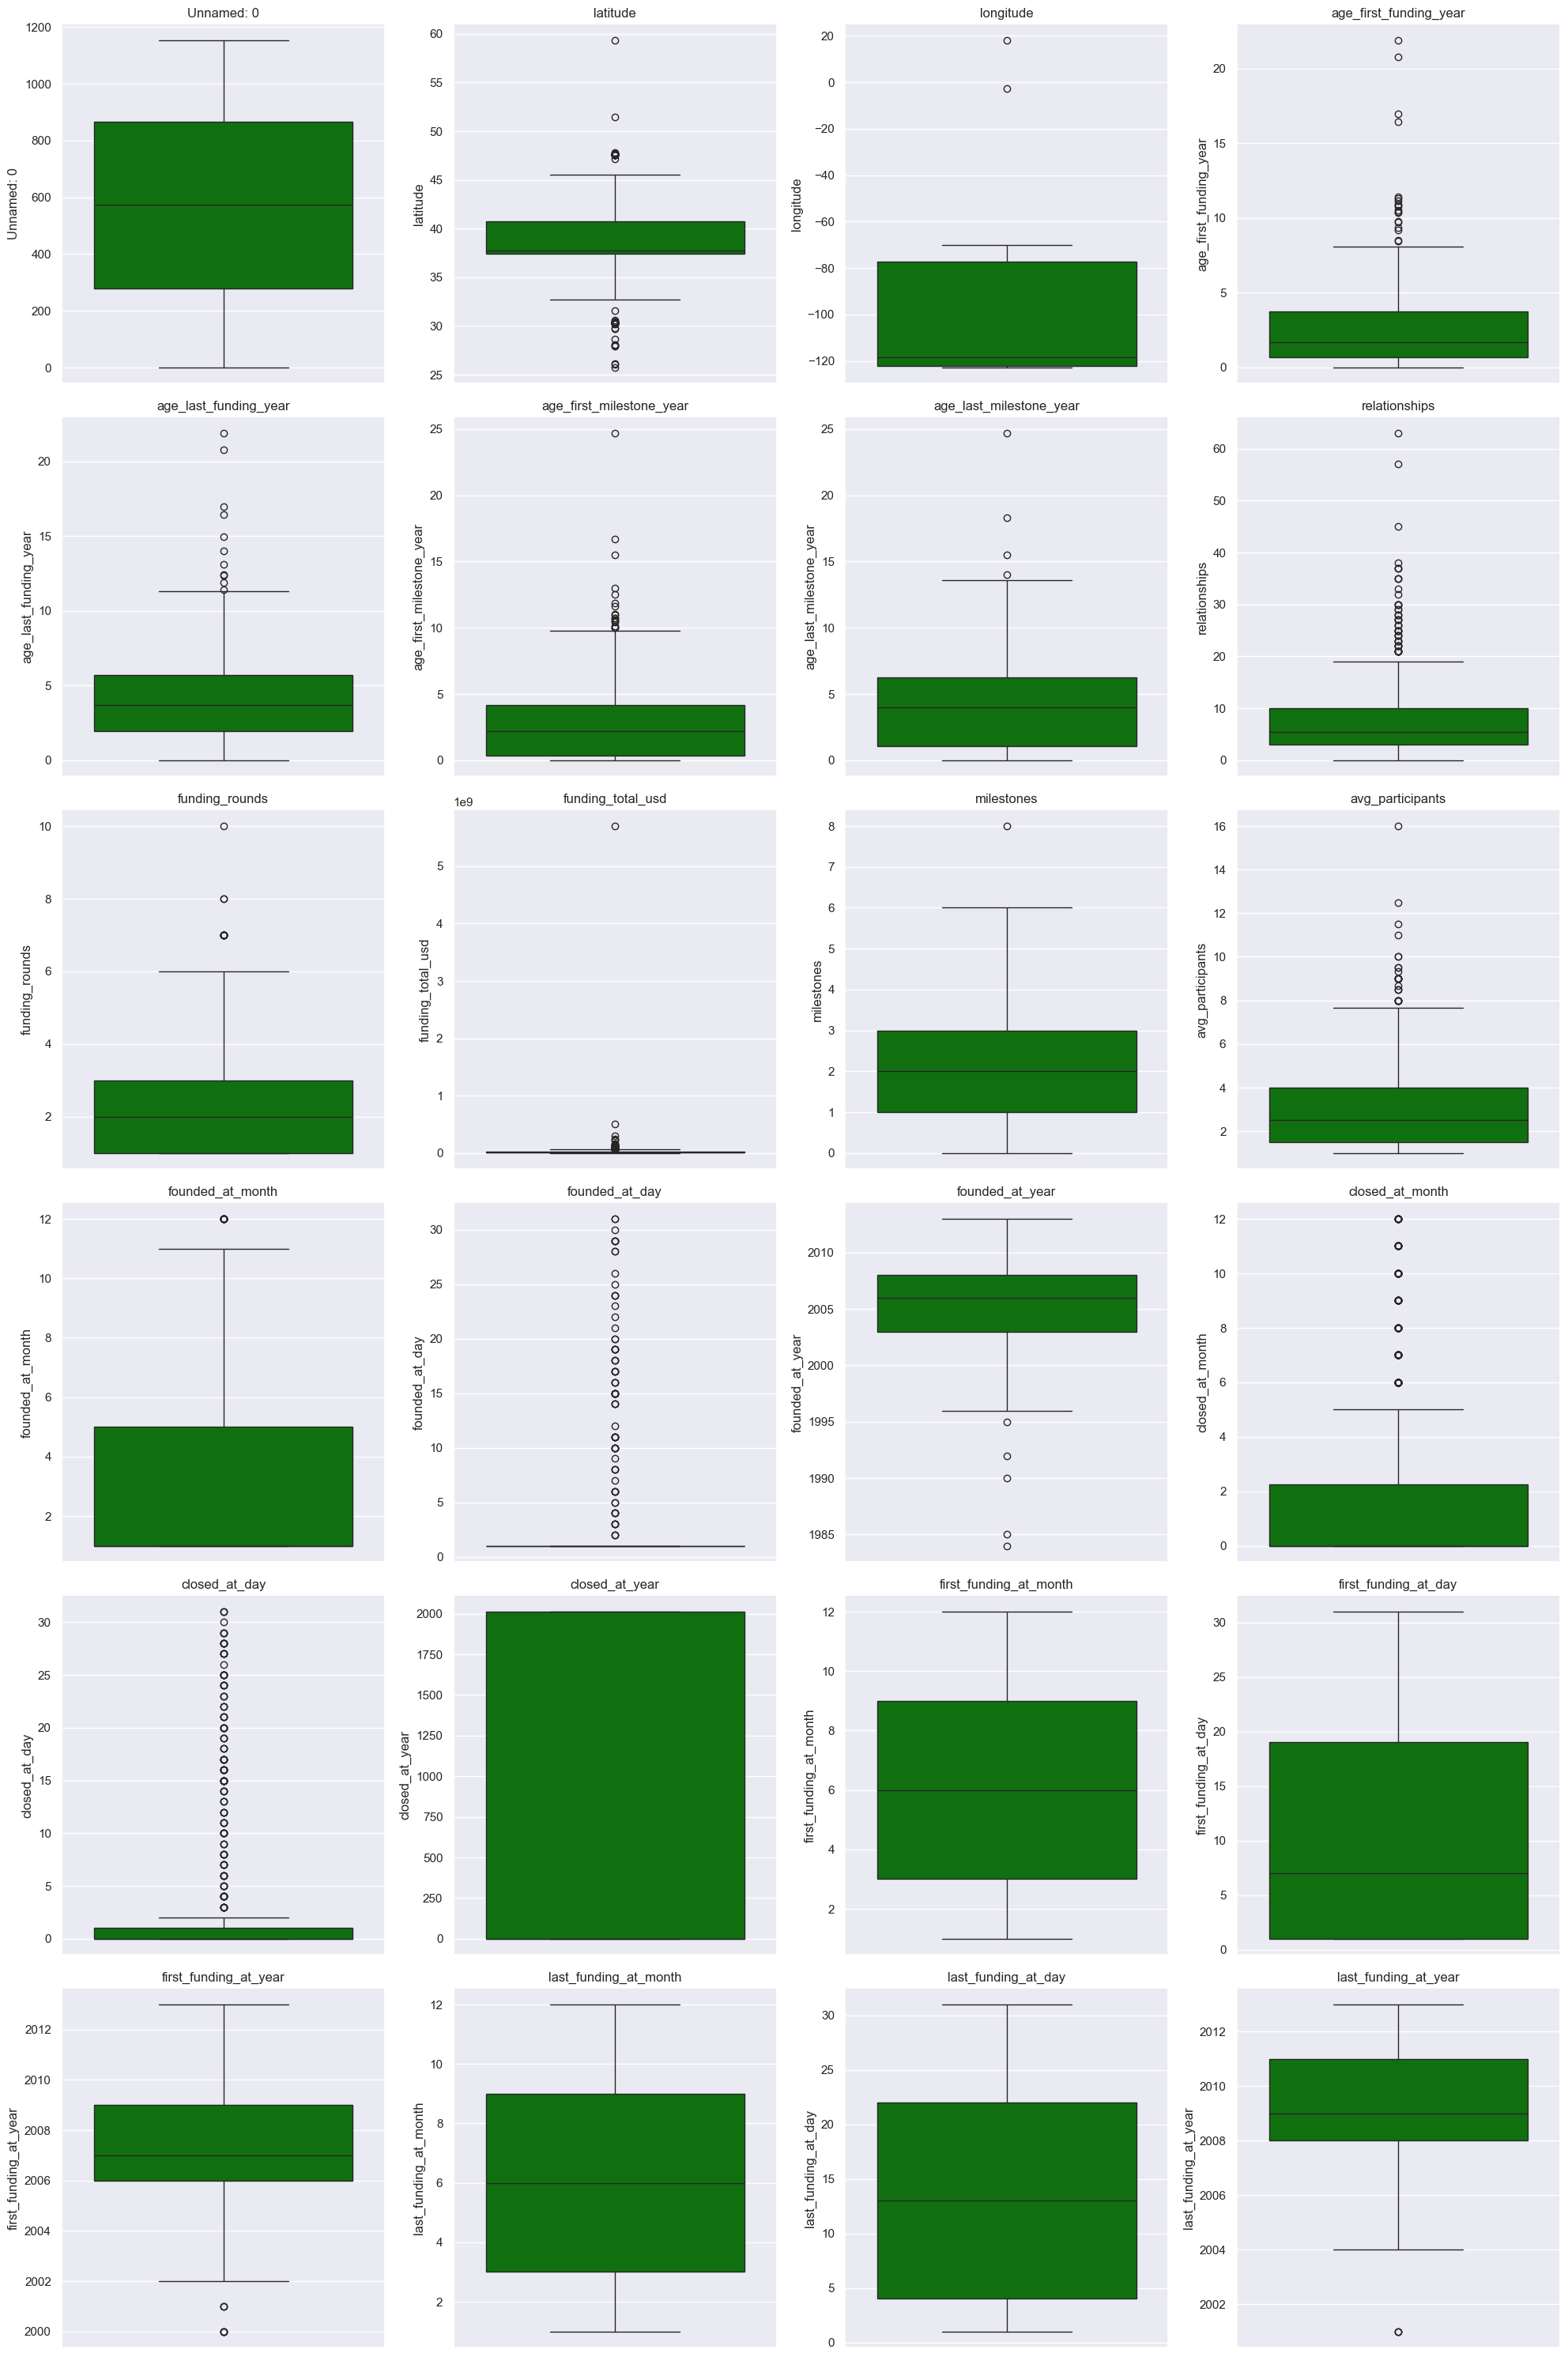

In [414]:
df_numeric = df_numeric.loc[:, df_numeric.nunique() > 1] # remove columns with only one unique value
# Remove binary columns (0/1 only) 
df_numeric = df_numeric.loc[:, ~df_numeric.apply(lambda col: set(col.dropna().unique()).issubset({0, 1}))]

n_cols = 4
n_rows = int(np.ceil(len(df_numeric.columns) / n_cols))

plt.figure(figsize=(5 * n_cols, 5 * n_rows)) 

for i, col in enumerate(df_numeric.columns):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.boxplot(y=df[col], color='green')
    plt.title(col)
    plt.xticks([]) 

plt.tight_layout()
plt.show()


##### **Number of Startups Founded Over the Years, Months and Days**

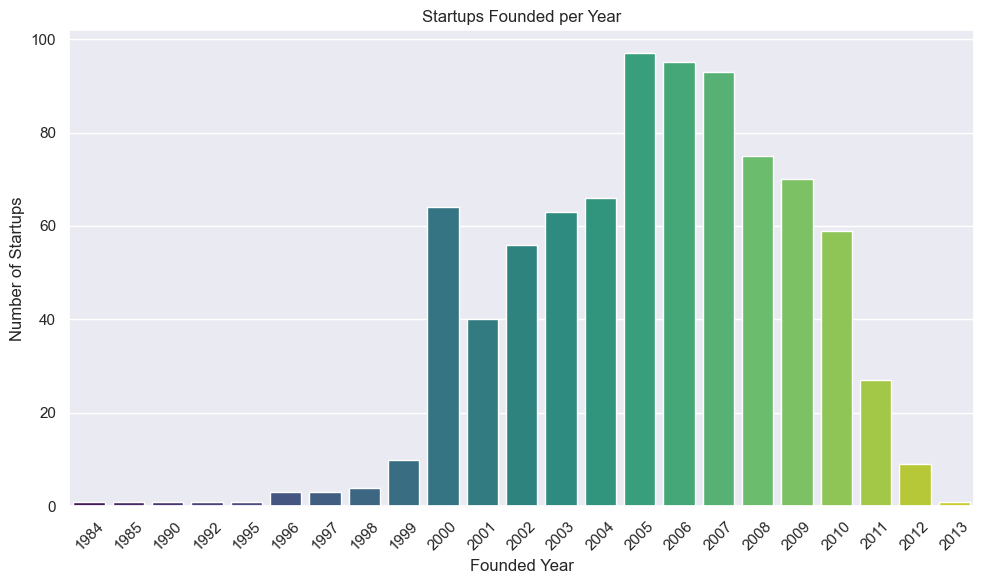

In [415]:
cdf = df['founded_at_year'].value_counts().sort_index().reset_index()
cdf.columns = ['year', 'No_of_startup']

plt.figure(figsize=(10, 6))
sns.barplot(data=cdf, x='year', y='No_of_startup', palette='viridis')
plt.xlabel("Founded Year")
plt.ylabel("Number of Startups")
plt.title("Startups Founded per Year")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


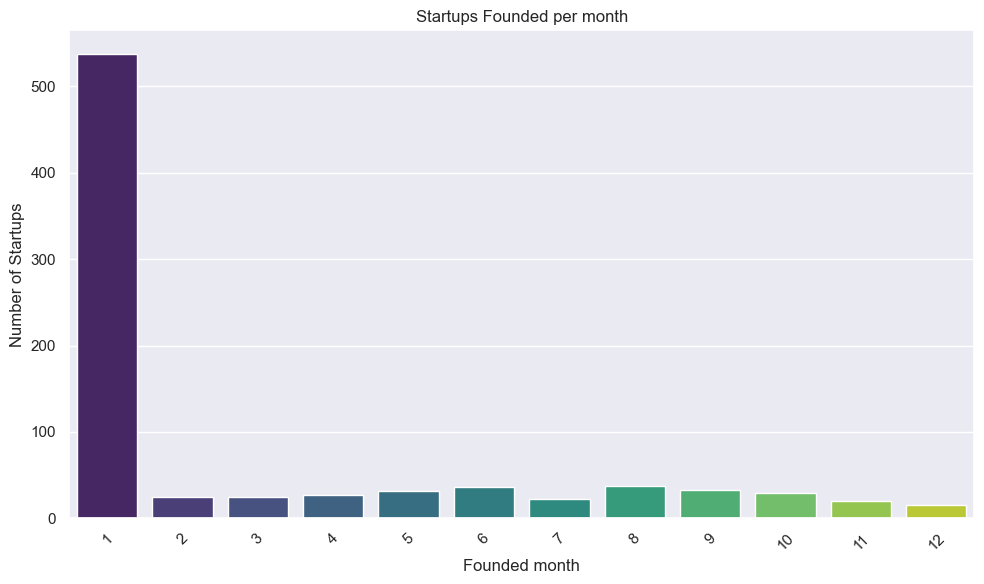

In [416]:
df_=df['founded_at_month'].value_counts().sort_index().reset_index()
df_.columns = ['month', 'No_of_startup']

plt.figure(figsize=(10, 6))
sns.barplot(data=df_, x='month', y='No_of_startup', palette='viridis')
plt.xlabel("Founded month")
plt.ylabel("Number of Startups")
plt.title("Startups Founded per month")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


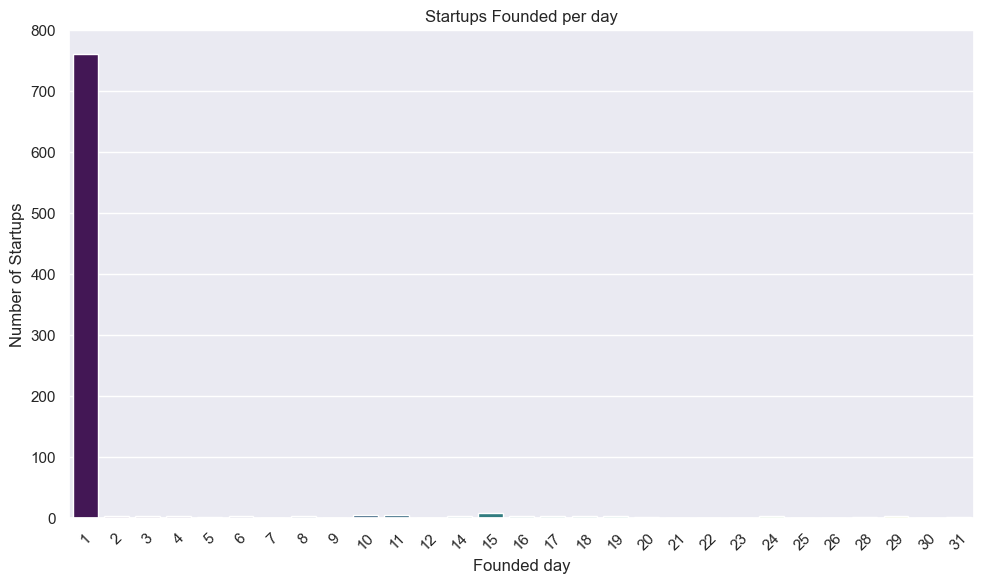

In [417]:
df_=df['founded_at_day'].value_counts().sort_index().reset_index()
df_.columns = ['day', 'No_of_startup']

plt.figure(figsize=(10, 6))
sns.barplot(data=df_, x='day', y='No_of_startup', palette='viridis')
plt.xlabel("Founded day")
plt.ylabel("Number of Startups")
plt.title("Startups Founded per day")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


While analyzing the distribution of startup founding months, an unusual spike in January was observed — over 60% of startups appeared to be founded in January, especially on January 1st.
* This indicated potential data quality issues, rather than real-world behavior.
Upon inspecting the all 3 founded_at columns:
* Over 550 entries had 01-01 as the founding date
* These dates are likely defaults inserted during data entry or parsing, especially when only the year was originally known



##### **Handling Placeholder Dates in Startup Founding Data**

In [418]:
df_cleaned = df[~((df['founded_at_month'] == 1) & (df['founded_at_day'] == 1))]


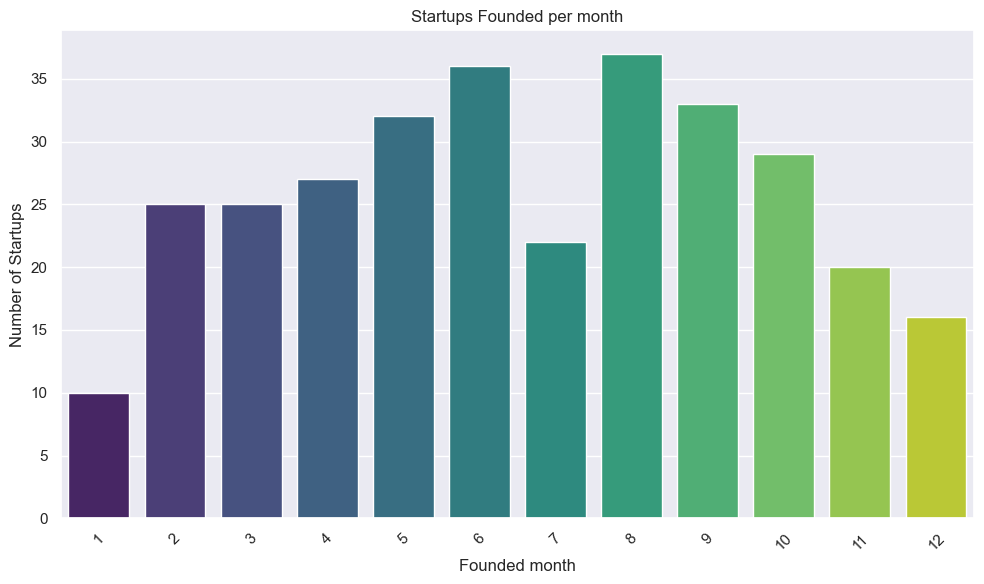

In [419]:
df_=df_cleaned['founded_at_month'].value_counts().sort_index().reset_index()
df_.columns = ['month', 'No_of_startup']

plt.figure(figsize=(10, 6))
sns.barplot(data=df_, x='month', y='No_of_startup', palette='viridis')
plt.xlabel("Founded month")
plt.ylabel("Number of Startups")
plt.title("Startups Founded per month")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#####  **Number of Startups acquired and closed**

In [420]:
df_acquired = df[(df["status"] == True)]
df_acquired.shape

(552, 54)

In [421]:
df_closed = df[(df["status"] == False)]
df_closed.shape

(288, 54)

Text(0.5, 1.0, 'Startup Acquired')

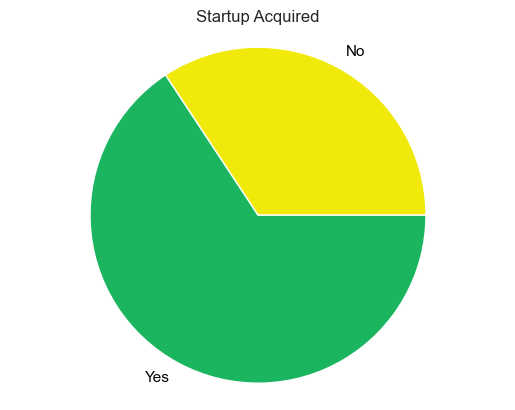

In [422]:
value_counts = df["status"].value_counts().to_dict()
fig, ax = plt.subplots()
ax.pie(x=[value_counts[False], value_counts[True]], labels=['No', 'Yes'], 
           colors=["#f1e909", "#1bb560"], textprops={'color': '#040204'})
ax.axis('equal')
ax.set_title('Startup Acquired')

##### **Category wise startup distribution**

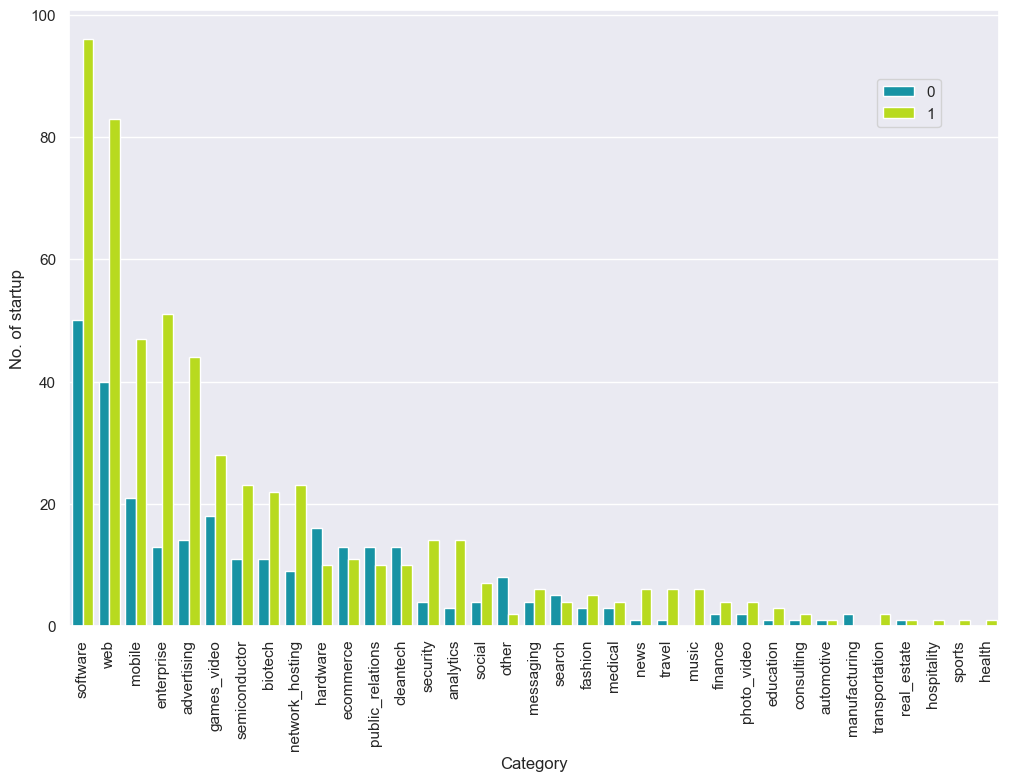

In [423]:
fig, ax = plt.subplots(figsize=(12,8))

sns.countplot(x="category_code", hue="status", data=df, palette="nipy_spectral",
              order=df.category_code.value_counts().index)

ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set(xlabel="Category", ylabel="No. of startup")
plt.legend(bbox_to_anchor=(0.945, 0.90))

##### **Category with largest number of Success Rate**

In [424]:
data1 = df[df['status']==1].groupby(['category_code']).agg({'status':'count'}).reset_index()
data1.columns=['category_code','total_success']

data2 = df[df['status']==0].groupby(['category_code']).agg({'status':'count'}).reset_index()
data2.columns=['category_code','total_closed']

data3=df.groupby(['category_code']).agg({'status':'count'}).reset_index()
data3.columns=['category_code','total_startup']

data1= data1.merge(data2, on='category_code')
data1= data1.merge(data3, on='category_code')

data1['success_rate']= round((data1['total_success'] / data1['total_startup']) * 100,2)

most_succes_rate = data1.sort_values('success_rate', ascending=False)
most_succes_rate

,category_code,total_success,total_closed,total_startup,success_rate
17,news,6,1,7,85.71
27,travel,6,1,7,85.71
1,analytics,14,3,17,82.35
8,enterprise,51,13,64,79.69
23,security,14,4,18,77.78
0,advertising,44,14,58,75.86
7,education,3,1,4,75.00
16,network_hosting,23,9,32,71.88
15,mobile,47,21,68,69.12
24,semiconductor,23,11,34,67.65


[Text(0.5, 0, 'Category'), Text(0, 0.5, 'Success Rate of Start Up')]

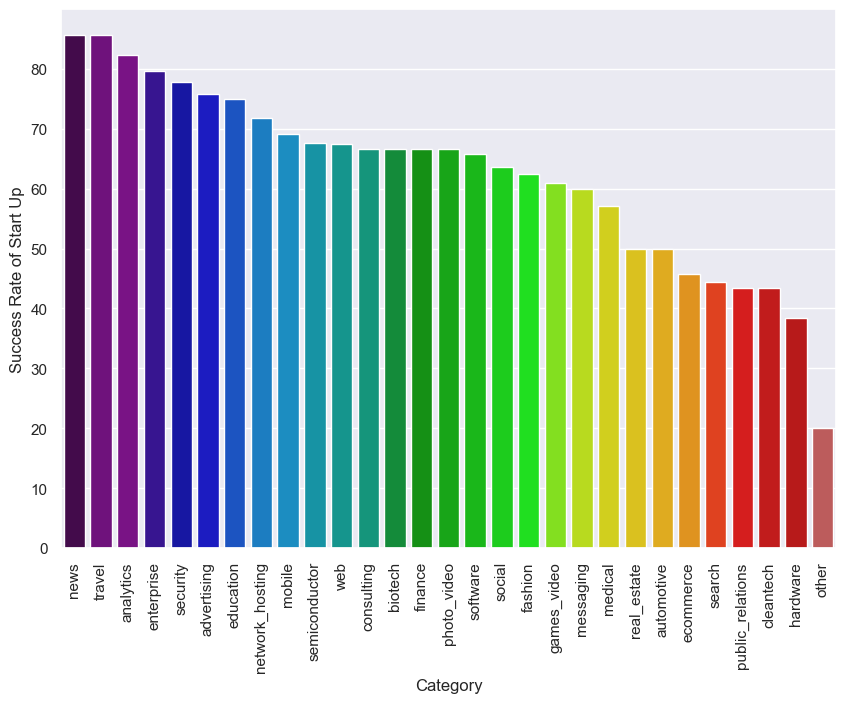

In [425]:
fig, ax = plt.subplots(figsize=(10,7))
sns.barplot(x="category_code", y="success_rate", data=most_succes_rate,
                
                palette="nipy_spectral", ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set(xlabel="Category", ylabel="Success Rate of Start Up")

#### **Category with most number of total funding**

In [426]:
funding_sorted_category = pd.pivot_table(df,
              index=['category_code'],
              values=['funding_total_usd'],
              aggfunc=['sum']
              ).reset_index()
funding_sorted_category.columns = ['category_code', 'funding_total_usd']
funding_sorted_category = funding_sorted_category.sort_values(['funding_total_usd'], ascending = False)
funding_sorted_category.head(10)

,category_code,funding_total_usd
18,mobile,7176623599
30,software,2584384065
3,biotech,1704689813
34,web,1595787702
8,enterprise,1307185096
4,cleantech,1300284730
28,semiconductor,1095156970
0,advertising,871544012
11,games_video,784548530
12,hardware,753718873


[Text(0.5, 0, 'Category'), Text(0, 0.5, 'Total Funding USD')]

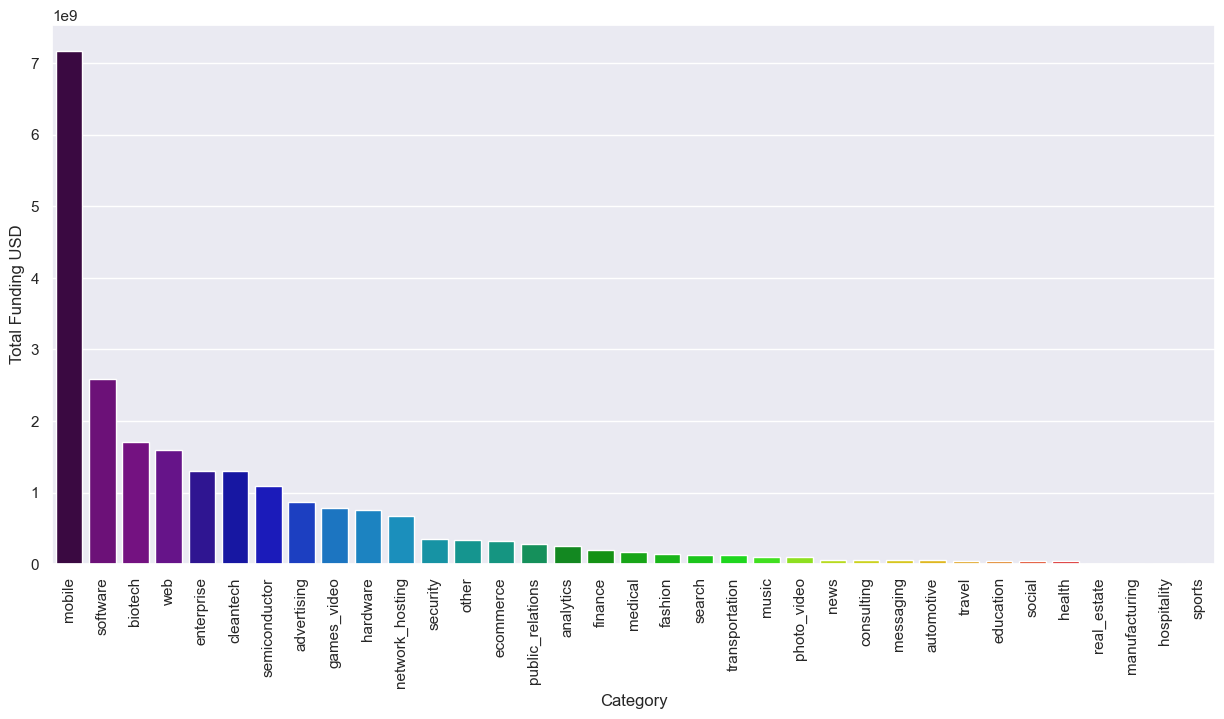

In [427]:
fig, ax = plt.subplots(figsize=(15,7))
sns.barplot(x="category_code", y="funding_total_usd", data=funding_sorted_category,
                palette="nipy_spectral", ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set(xlabel="Category", ylabel="Total Funding USD")

##### **State with highest number of Startup**

In [428]:
state_a = df.groupby(['state_code']).size().rename('num_startup').reset_index()

most_state_a = state_a[state_a.groupby('state_code')['num_startup'].transform(max) == state_a['num_startup']]
most_state_a = most_state_a.sort_values('num_startup', ascending=False)
most_state_a

,state_code,num_startup
2,CA,448
23,NY,96
12,MA,74
29,TX,39
32,WA,36
3,CO,19
9,IL,17
26,PA,16
7,GA,11
31,VA,11


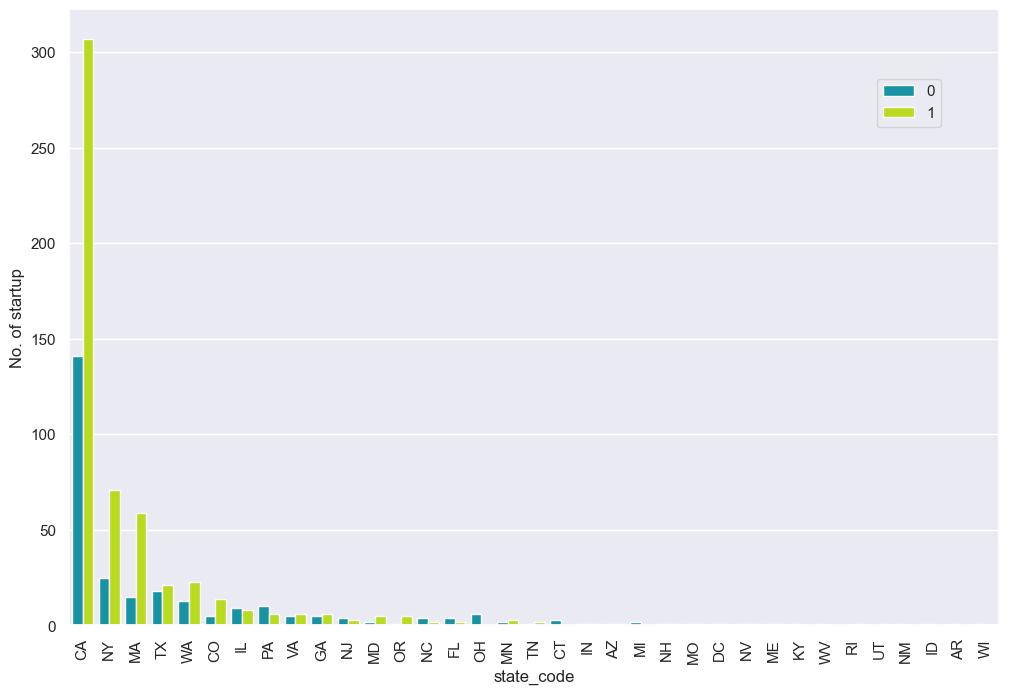

In [429]:
fig, ax = plt.subplots(figsize=(12,8))

sns.countplot(x="state_code", hue="status", data=df, palette="nipy_spectral",
              order=df.state_code.value_counts().index)

ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set(xlabel="state_code", ylabel="No. of startup")
plt.legend(bbox_to_anchor=(0.945, 0.90))

##### **State with highest number of Startups acquired per category**

In [430]:
state_a = df_acquired.groupby(['state_code','category_code']).size().rename('num_startup').reset_index()

most_state_a = state_a[state_a.groupby('state_code')['num_startup'].transform(max) == state_a['num_startup']]
most_state_a = most_state_a.sort_values('num_startup', ascending=False)
most_state_a.head(10)

,state_code,category_code,num_startup
26,CA,software,50
67,MA,software,15
105,NY,web,12
135,WA,mobile,5
49,IL,software,4
128,TX,web,4
121,TX,enterprise,4
36,CO,software,4
42,GA,enterprise,2
132,VA,web,2


##### **State with highest number of Startups closed per category**

In [431]:
state_c = df_closed.groupby(['state_code','category_code']).size().rename('num_startup').reset_index()

most_state_c = state_c[state_c.groupby('state_code')['num_startup'].transform(max) == state_c['num_startup']]
most_state_c = most_state_c.sort_values('num_startup', ascending=False)
most_state_c

,state_code,category_code,num_startup
27,CA,web,21
59,MA,software,8
90,NY,web,6
116,TX,software,5
51,IL,web,3
129,WA,software,3
100,PA,games_video,2
76,NJ,software,2
43,GA,software,2
39,FL,software,2


##### **City with highest number of acquired Startup per category**

In [432]:
city_a = df_acquired.groupby(['city','category_code']).size().rename('num_startup').reset_index()

most_city_a = city_a[city_a.groupby('city')['num_startup'].transform(max) == city_a['num_startup']]
most_city_a = most_city_a.sort_values('num_startup', ascending=False)
most_city_a

,city,category_code,num_startup
260,San Francisco,web,22
184,New York,web,12
159,Mountain View,web,8
274,San Mateo,software,8
315,Sunnyvale,software,8
198,Palo Alto,software,7
285,Santa Clara,semiconductor,5
326,Waltham,software,4
21,Austin,web,4
74,Chicago,software,4


##### **City having highest number of closed Startup per category**

In [433]:
trending_categoryc = df_closed.groupby(['city','category_code']).size().rename('num_startup').reset_index()

most_trending_categoryc = trending_categoryc[trending_categoryc.groupby('city')['num_startup'].transform(max) == trending_categoryc['num_startup']].reset_index()
most_trending_categoryc = most_trending_categoryc.sort_values('num_startup', ascending=False)
most_trending_categoryc

,index,city,category_code,num_startup
128,197,Santa Clara,software,5
124,184,San Jose,hardware,5
93,128,New York,games_video,4
121,175,San Francisco,mobile,4
122,181,San Francisco,web,4
125,190,San Mateo,web,4
98,141,Palo Alto,web,3
97,140,Palo Alto,software,3
11,15,Austin,mobile,2
26,35,Burlington,software,2


#### **City with highest number of total funding**

In [434]:
funding_sorted_city = pd.pivot_table(df,
              index=['city'],
              values=['funding_total_usd'],
              aggfunc=['sum']
              ).reset_index()
funding_sorted_city.columns = ['city', 'funding_total_usd']
funding_sorted_city = funding_sorted_city.sort_values(['funding_total_usd'], ascending = False)
funding_sorted_city = funding_sorted_city.head(10)
funding_sorted_city

,city,funding_total_usd
89,Kirkland,5718914576
166,San Francisco,1602869129
132,New York,1138449953
123,Mountain View,896903322
173,Santa Clara,829550274
168,San Jose,732227780
13,Austin,659317317
165,San Diego,609475001
157,Redwood City,521330100
108,Loveland,510000000


[Text(0.5, 0, 'City'), Text(0, 0.5, 'Number of Start Up')]

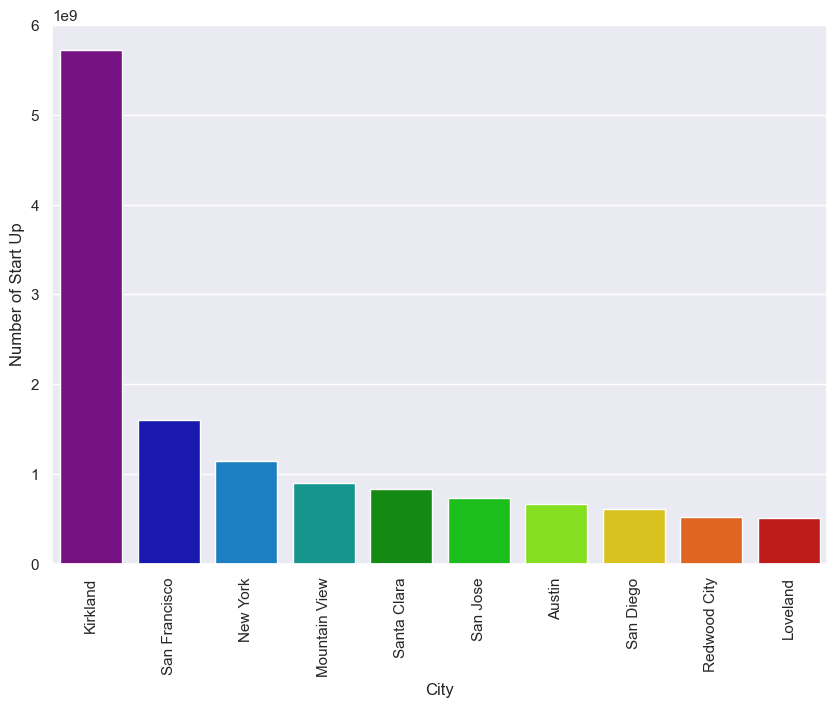

In [435]:
fig, ax = plt.subplots(figsize=(10,7))
sns.barplot(x="city", y="funding_total_usd", data=funding_sorted_city,
                palette="nipy_spectral", ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set(xlabel="City", ylabel="Number of Start Up")

In [436]:
df_what_in_kirkland = df[(df["city"] == 'Kirkland')]
df_what_in_kirkland.shape

(2, 54)

In [437]:
df_what_in_kirkland.head()

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,name,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status,founded_at_month,founded_at_day,founded_at_year,closed_at_month,closed_at_day,closed_at_year,first_funding_at_month,first_funding_at_day,first_funding_at_year,last_funding_at_month,last_funding_at_day,last_funding_at_year
62,332,WA,47.675489,-122.191667,98033-6314,c:19861,Kirkland,SchemaLogic,4.0466,9.3041,6.0027,6.0027,2,5,18914576,1,0,0,0,0,1,enterprise,0,0,0,1,0,0,0,0,0,0,c:19861,1,0,0,0,1,0,3.00,1,1,1,1,2001,0.0,0.0,0.0,1,17,2005,4,20,2010
364,86,WA,30.632480,-86.984345,98033,c:13219,Kirkland,Clearwire,4.6000,9.4164,5.2575,9.7753,19,4,5700000000,2,0,0,0,0,1,mobile,0,0,1,0,0,0,0,0,0,0,c:13219,0,0,0,0,0,0,4.25,1,1,10,1,2003,0.0,0.0,0.0,5,6,2008,2,27,2013


For index 364, Round A, Round B, Round D, VC, Angel = 0 . 
* All funding rounds are marked as 0 ,meaning the startup did not receive any funding.
* But the same startup has a status of “acquired”.
* There's a possibility of invalid data.

##### **Number of Startups having has_VC?**

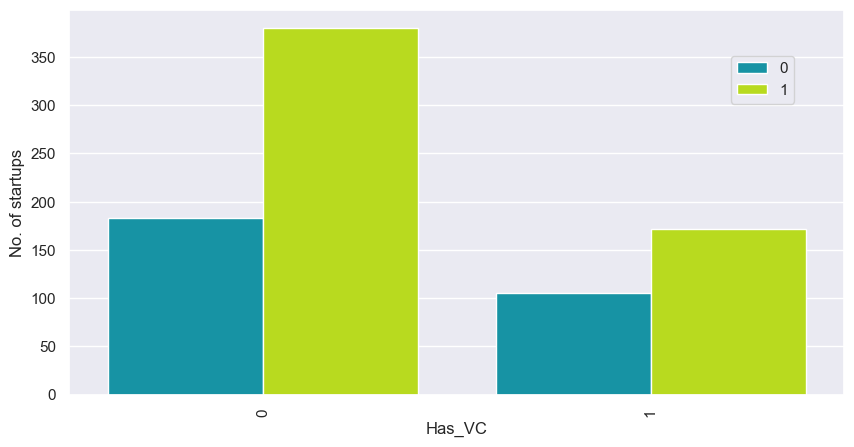

In [438]:
fig, ax = plt.subplots(figsize=(10,5))

sns.countplot(x="has_VC", hue="status", data=df, palette="nipy_spectral",
              order=df.has_VC.value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set(xlabel="Has_VC", ylabel="No. of startups")
plt.legend(bbox_to_anchor=(0.945, 0.90))

##### **Number of Startups having is_top500**

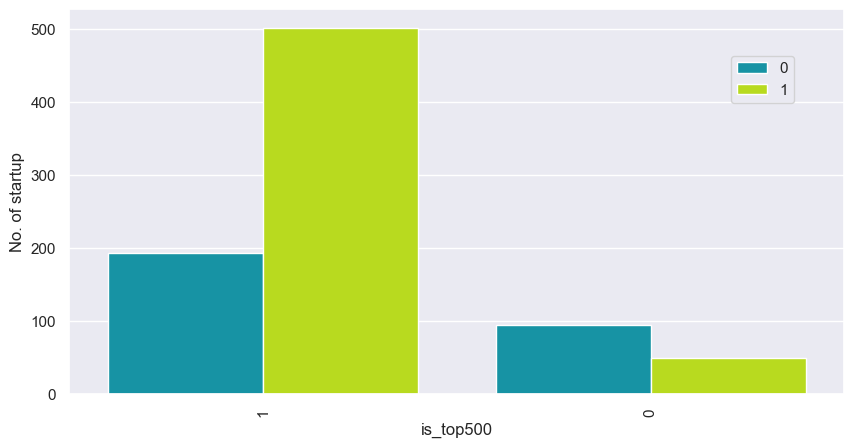

In [439]:
fig, ax = plt.subplots(figsize=(10,5))

sns.countplot(x="is_top500", hue="status", data=df, palette="nipy_spectral",
              order=df.is_top500.value_counts().index)

ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set(xlabel="is_top500", ylabel="No. of startup")
plt.legend(bbox_to_anchor=(0.945, 0.90))

##### **Number of Startups having both 'acquired' status and is_top500**

In [440]:
len(df[(df["status"] == True) & (df["is_top500"] == True)].index)

502

In [441]:
df_acquired["is_top500"].value_counts(normalize=True)

is_top500
1    0.90942
0    0.09058
Name: proportion, dtype: float64

##### **Number of Startups having both 'closed' status and is_top500**

In [442]:
len(df[(df["status"] == False) & (df["is_top500"] == False)].index)

95

In [443]:
df_closed["is_top500"].value_counts(normalize=True)

is_top500
1    0.670139
0    0.329861
Name: proportion, dtype: float64

##### **Number of years on average the company closes**

In [444]:
df_closed['age_closed_startup'] = df_closed.apply(lambda row: (row.closed_at_year - row.founded_at_year) , axis=1)

In [445]:
df_closed['age_closed_startup'].head()

4      2.0
5      7.0
12     8.0
15    11.0
16     9.0
Name: age_closed_startup, dtype: float64

In [446]:
(df_closed['age_closed_startup'].mean()) 

np.float64(6.034722222222222)

On an average , startups closed after 6 years. 


##### **How many relationships startups have?**

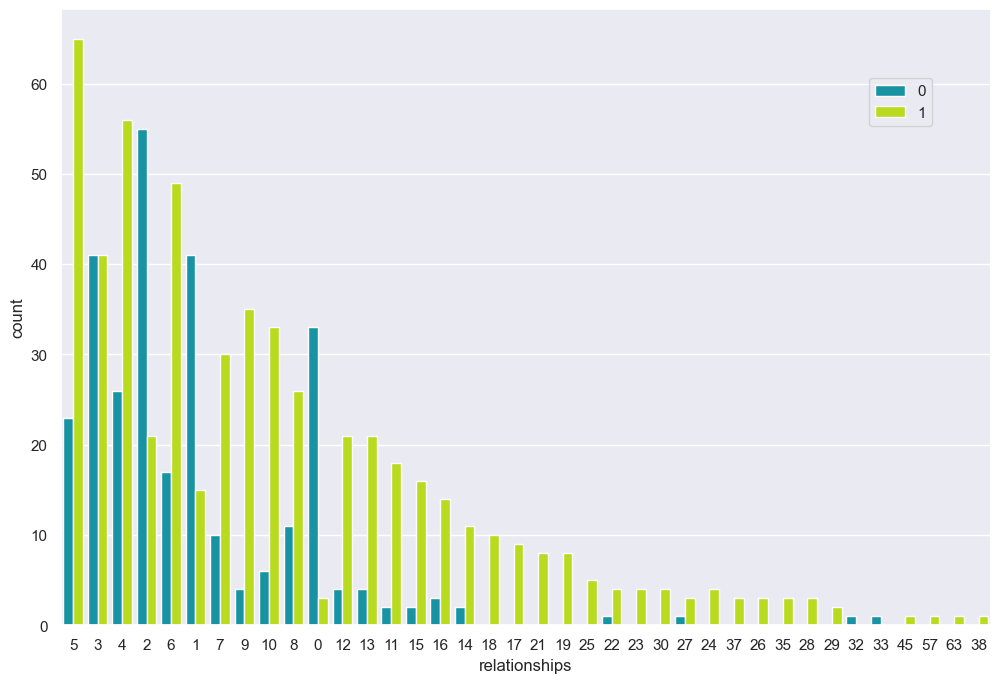

In [447]:
fig, ax = plt.subplots(figsize=(12,8))

sns.countplot(x="relationships", hue="status", data=df, palette="nipy_spectral",
              order=df.relationships.value_counts().index)
plt.legend(bbox_to_anchor=(0.945, 0.90))

##### **How many funding rounds a startup has gone through**

<Axes: xlabel='funding_rounds', ylabel='count'>

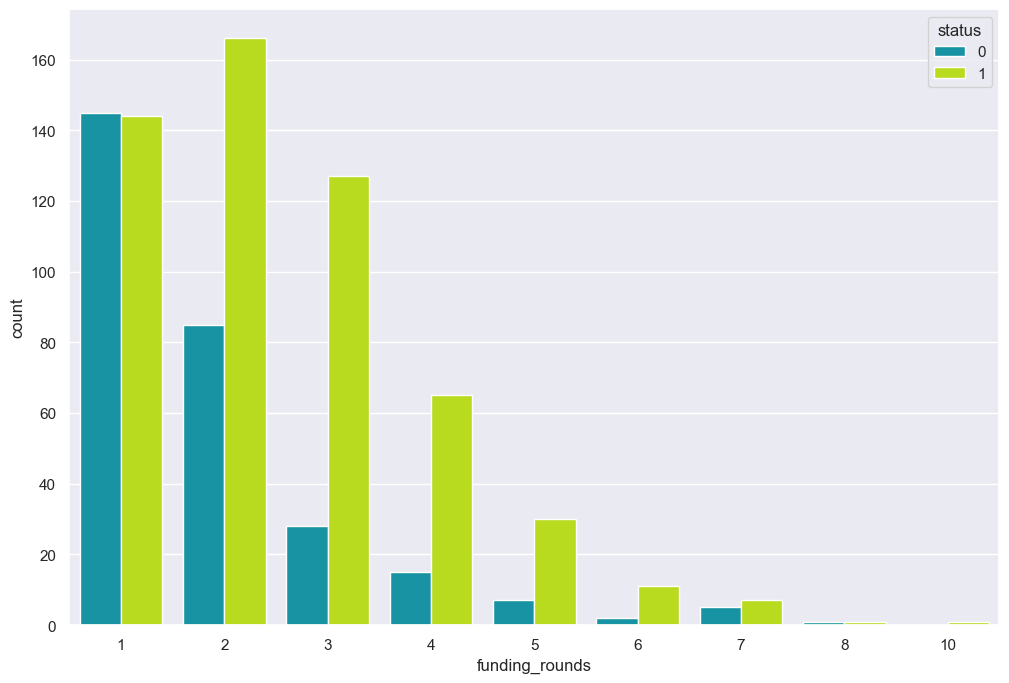

In [448]:
fig, ax = plt.subplots(figsize=(12,8))

sns.countplot(x="funding_rounds", hue="status", data=df, palette="nipy_spectral",
              order=df.funding_rounds.value_counts().index)

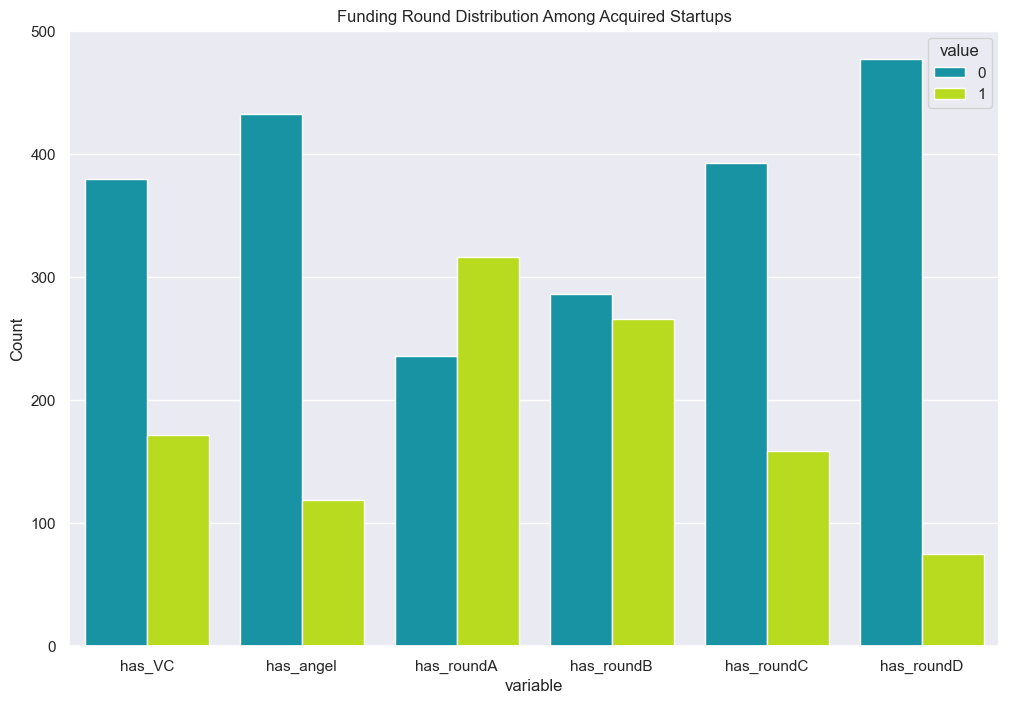

In [449]:
c_df = df[df["status"] == 1]  

features = c_df[["has_VC", "has_angel", "has_roundA", "has_roundB", "has_roundC", "has_roundD"]]

plt.figure(figsize=(12, 8))
sns.countplot(
    x="variable",
    hue="value",
    palette="nipy_spectral",
    data=pd.melt(features)
)

plt.title("Funding Round Distribution Among Acquired Startups")
plt.ylabel("Count")
plt.show()


#### **Outliers**

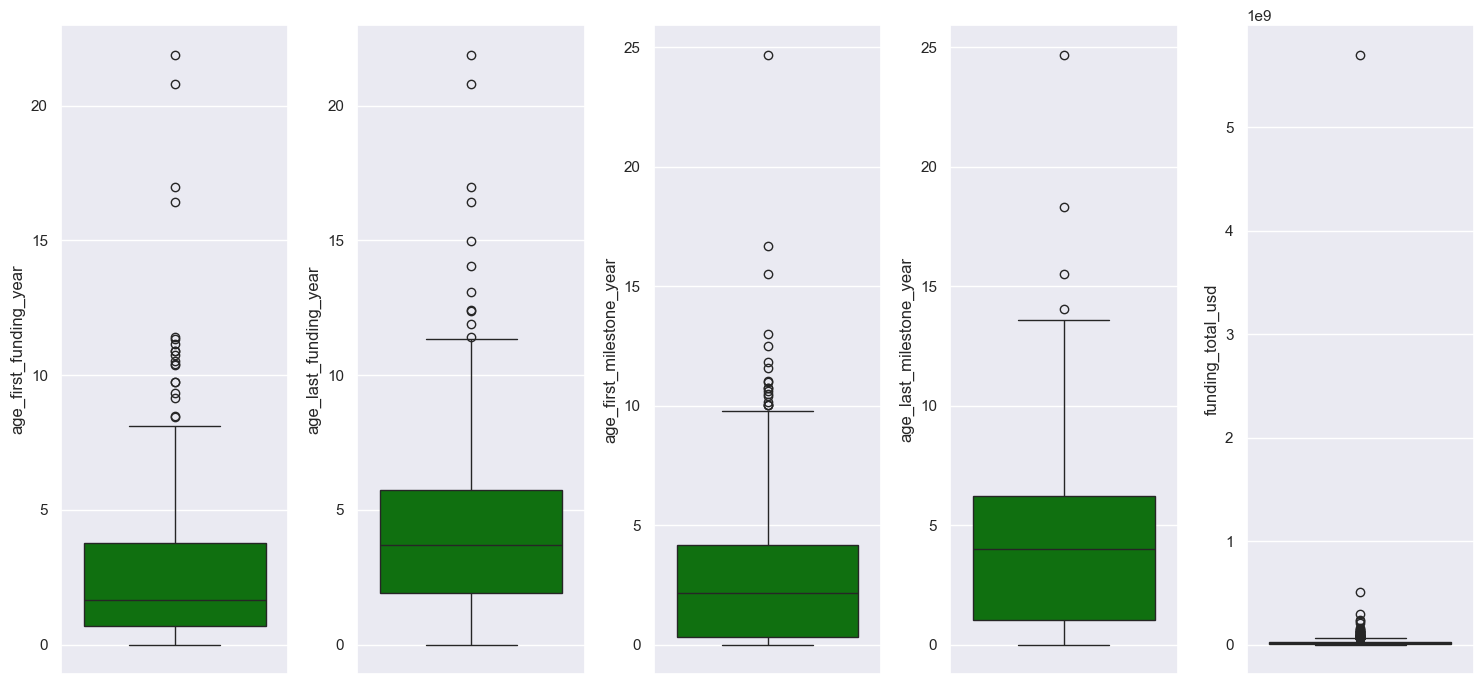

In [450]:
featuresNumfinal = ['age_first_funding_year','age_last_funding_year','age_first_milestone_year','age_last_milestone_year','funding_total_usd']

plt.figure(figsize=(15, 7))
for i in range(0, len(featuresNumfinal)):
    plt.subplot(1, len(featuresNumfinal), i+1)
    sns.boxplot(y=df[featuresNumfinal[i]], color='green', orient='v')
    plt.tight_layout()

#### **Applying Log-transformation to the funding and milestone year variable**

In [451]:
df["age_first_funding_year"] = np.log1p(df["age_first_funding_year"])
df["age_last_funding_year"] = np.log1p(df["age_last_funding_year"])
df["age_first_milestone_year"] = np.log1p(df["age_first_milestone_year"])
df["age_last_milestone_year"] = np.log1p(df["age_last_milestone_year"])
df["funding_total_usd"] = np.log1p(df["funding_total_usd"])

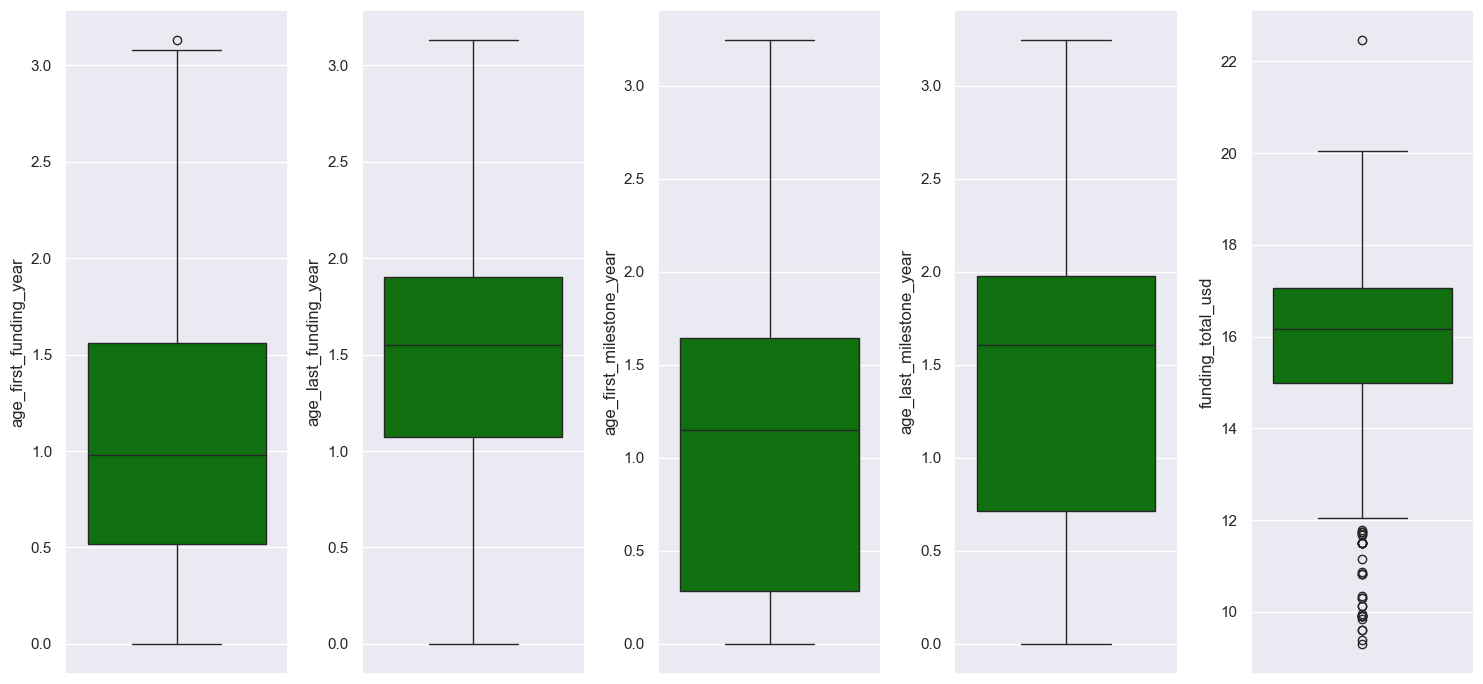

In [452]:
featuresNumfinal = ['age_first_funding_year','age_last_funding_year','age_first_milestone_year','age_last_milestone_year','funding_total_usd']

plt.figure(figsize=(15, 7))
for i in range(0, len(featuresNumfinal)):
    plt.subplot(1, len(featuresNumfinal), i+1)
    sns.boxplot(y=df[featuresNumfinal[i]], color='green', orient='v')
    plt.tight_layout()

### **Feature Engineering**

#### **Adding New Column "has_RoundABCD"**

In [453]:
df['has_RoundABCD'] = np.where((df['has_roundA'] == 1) | (df['has_roundB'] == 1) | (df['has_roundC'] == 1) | (df['has_roundD'] == 1), 1, 0)
df.head()

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,name,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status,founded_at_month,founded_at_day,founded_at_year,closed_at_month,closed_at_day,closed_at_year,first_funding_at_month,first_funding_at_day,first_funding_at_year,last_funding_at_month,last_funding_at_day,last_funding_at_year,has_RoundABCD
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,Bandsintown,1.178440,1.386969,1.734925,2.041753,3,3,12.834684,3,1,0,0,0,0,music,0,0,0,0,0,0,0,0,0,1,c:6669,0,1,0,0,0,0,1.0000,0,1,1,1,2007,0.0,0.0,0.0,4,1,2009,1,1,2010,0
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,TriCipher,1.812542,2.397650,2.080129,2.080129,9,4,17.506887,1,1,0,0,0,0,enterprise,0,0,0,1,0,0,0,0,0,0,c:16283,1,0,0,1,1,1,4.7500,1,1,1,1,2000,0.0,0.0,0.0,2,14,2005,12,28,2009,1
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,Plixi,0.709463,0.709463,0.899145,1.164868,5,1,14.771022,2,1,0,0,0,0,web,0,1,0,0,0,0,0,0,0,0,c:65620,0,0,1,0,0,0,4.0000,1,1,3,18,2009,0.0,0.0,0.0,3,30,2010,3,30,2010,1
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Solidcore Systems,1.418641,1.842944,1.946296,1.946296,5,3,17.504390,1,1,0,0,0,0,software,1,0,0,0,0,0,0,0,0,0,c:42668,0,0,0,1,1,1,3.3333,1,1,1,1,2002,0.0,0.0,0.0,2,17,2005,4,25,2007,1
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,Inhale Digital,0.000000,0.981517,0.037681,0.037681,2,2,14.077876,1,1,0,0,0,0,games_video,0,0,0,0,0,1,0,0,0,0,c:65806,1,1,0,0,0,0,1.0000,1,0,8,1,2010,10.0,1.0,2012.0,8,1,2010,4,1,2012,0


#### **Adding New Column "has_Investor"**

In [454]:
df['has_Investor'] = np.where((df['has_VC'] == 1) | (df['has_angel'] == 1), 1, 0)
df.head()

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,name,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status,founded_at_month,founded_at_day,founded_at_year,closed_at_month,closed_at_day,closed_at_year,first_funding_at_month,first_funding_at_day,first_funding_at_year,last_funding_at_month,last_funding_at_day,last_funding_at_year,has_RoundABCD,has_Investor
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,Bandsintown,1.178440,1.386969,1.734925,2.041753,3,3,12.834684,3,1,0,0,0,0,music,0,0,0,0,0,0,0,0,0,1,c:6669,0,1,0,0,0,0,1.0000,0,1,1,1,2007,0.0,0.0,0.0,4,1,2009,1,1,2010,0,1
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,TriCipher,1.812542,2.397650,2.080129,2.080129,9,4,17.506887,1,1,0,0,0,0,enterprise,0,0,0,1,0,0,0,0,0,0,c:16283,1,0,0,1,1,1,4.7500,1,1,1,1,2000,0.0,0.0,0.0,2,14,2005,12,28,2009,1,1
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,Plixi,0.709463,0.709463,0.899145,1.164868,5,1,14.771022,2,1,0,0,0,0,web,0,1,0,0,0,0,0,0,0,0,c:65620,0,0,1,0,0,0,4.0000,1,1,3,18,2009,0.0,0.0,0.0,3,30,2010,3,30,2010,1,0
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Solidcore Systems,1.418641,1.842944,1.946296,1.946296,5,3,17.504390,1,1,0,0,0,0,software,1,0,0,0,0,0,0,0,0,0,c:42668,0,0,0,1,1,1,3.3333,1,1,1,1,2002,0.0,0.0,0.0,2,17,2005,4,25,2007,1,0
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,Inhale Digital,0.000000,0.981517,0.037681,0.037681,2,2,14.077876,1,1,0,0,0,0,games_video,0,0,0,0,0,1,0,0,0,0,c:65806,1,1,0,0,0,0,1.0000,1,0,8,1,2010,10.0,1.0,2012.0,8,1,2010,4,1,2012,0,1


In [455]:
len(df)

840

#### **Adding New Column "has_Seed"**

The startups in this column have received early-stage funding, but havn’t yet moved into Series A-D rounds.

In [456]:
df['has_Seed'] = np.where((df['has_RoundABCD'] == 0) & (df['has_Investor'] == 1), 1, 0)
df.head()

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,name,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status,founded_at_month,founded_at_day,founded_at_year,closed_at_month,closed_at_day,closed_at_year,first_funding_at_month,first_funding_at_day,first_funding_at_year,last_funding_at_month,last_funding_at_day,last_funding_at_year,has_RoundABCD,has_Investor,has_Seed
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,Bandsintown,1.178440,1.386969,1.734925,2.041753,3,3,12.834684,3,1,0,0,0,0,music,0,0,0,0,0,0,0,0,0,1,c:6669,0,1,0,0,0,0,1.0000,0,1,1,1,2007,0.0,0.0,0.0,4,1,2009,1,1,2010,0,1,1
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,TriCipher,1.812542,2.397650,2.080129,2.080129,9,4,17.506887,1,1,0,0,0,0,enterprise,0,0,0,1,0,0,0,0,0,0,c:16283,1,0,0,1,1,1,4.7500,1,1,1,1,2000,0.0,0.0,0.0,2,14,2005,12,28,2009,1,1,0
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,Plixi,0.709463,0.709463,0.899145,1.164868,5,1,14.771022,2,1,0,0,0,0,web,0,1,0,0,0,0,0,0,0,0,c:65620,0,0,1,0,0,0,4.0000,1,1,3,18,2009,0.0,0.0,0.0,3,30,2010,3,30,2010,1,0,0
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Solidcore Systems,1.418641,1.842944,1.946296,1.946296,5,3,17.504390,1,1,0,0,0,0,software,1,0,0,0,0,0,0,0,0,0,c:42668,0,0,0,1,1,1,3.3333,1,1,1,1,2002,0.0,0.0,0.0,2,17,2005,4,25,2007,1,0,0
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,Inhale Digital,0.000000,0.981517,0.037681,0.037681,2,2,14.077876,1,1,0,0,0,0,games_video,0,0,0,0,0,1,0,0,0,0,c:65806,1,1,0,0,0,0,1.0000,1,0,8,1,2010,10.0,1.0,2012.0,8,1,2010,4,1,2012,0,1,1


In [457]:
df['has_Seed'] == 1

0       True
1      False
2      False
3      False
4       True
5      False
6      False
7      False
8      False
9      False
10     False
12      True
13     False
14     False
15      True
16     False
18     False
19     False
20     False
21     False
22     False
24     False
25     False
26     False
27     False
28     False
29      True
30     False
31     False
33      True
34      True
35     False
36     False
37     False
38     False
39     False
40     False
41      True
42     False
43     False
44     False
45     False
46     False
47     False
48      True
49     False
50     False
51     False
52     False
53     False
54     False
55     False
56     False
57     False
58     False
59     False
61     False
62     False
63      True
64     False
65     False
66      True
67      True
68     False
69     False
70     False
72      True
73     False
74     False
75     False
76      True
77     False
78     False
81     False
82      True
83     False
84     False

In [458]:
len(df[(df["has_Seed"] == 1)].index)

179

#### **Adding New Column "invalid_Startup"**

In [459]:
df['invalid_startup'] = np.where((df['has_RoundABCD'] == 0) & (df['has_VC'] == 0) & (df['has_angel'] == 0), 1, 0)
df.head()

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,name,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status,founded_at_month,founded_at_day,founded_at_year,closed_at_month,closed_at_day,closed_at_year,first_funding_at_month,first_funding_at_day,first_funding_at_year,last_funding_at_month,last_funding_at_day,last_funding_at_year,has_RoundABCD,has_Investor,has_Seed,invalid_startup
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,Bandsintown,1.178440,1.386969,1.734925,2.041753,3,3,12.834684,3,1,0,0,0,0,music,0,0,0,0,0,0,0,0,0,1,c:6669,0,1,0,0,0,0,1.0000,0,1,1,1,2007,0.0,0.0,0.0,4,1,2009,1,1,2010,0,1,1,0
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,TriCipher,1.812542,2.397650,2.080129,2.080129,9,4,17.506887,1,1,0,0,0,0,enterprise,0,0,0,1,0,0,0,0,0,0,c:16283,1,0,0,1,1,1,4.7500,1,1,1,1,2000,0.0,0.0,0.0,2,14,2005,12,28,2009,1,1,0,0
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,Plixi,0.709463,0.709463,0.899145,1.164868,5,1,14.771022,2,1,0,0,0,0,web,0,1,0,0,0,0,0,0,0,0,c:65620,0,0,1,0,0,0,4.0000,1,1,3,18,2009,0.0,0.0,0.0,3,30,2010,3,30,2010,1,0,0,0
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Solidcore Systems,1.418641,1.842944,1.946296,1.946296,5,3,17.504390,1,1,0,0,0,0,software,1,0,0,0,0,0,0,0,0,0,c:42668,0,0,0,1,1,1,3.3333,1,1,1,1,2002,0.0,0.0,0.0,2,17,2005,4,25,2007,1,0,0,0
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,Inhale Digital,0.000000,0.981517,0.037681,0.037681,2,2,14.077876,1,1,0,0,0,0,games_video,0,0,0,0,0,1,0,0,0,0,c:65806,1,1,0,0,0,0,1.0000,1,0,8,1,2010,10.0,1.0,2012.0,8,1,2010,4,1,2012,0,1,1,0


In [460]:
len(df[(df["invalid_startup"] == 1)].index)

25

#### **Adding New Column "tier_relationships"**

In [461]:
# Define conditions for binning the 'relationships' column
conditions = [
    (df['relationships'] <= 5),
    (df['relationships'] > 5) & (df['relationships'] <= 10),
    (df['relationships'] > 10) & (df['relationships'] <= 16),
    (df['relationships'] > 16)
]

# Define numeric tier values (integers)
values = [4, 3, 2, 1]

# Add a default of same type (integer)
df['tier_relationships'] = np.select(conditions, values, default=0)

df.head()


,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,name,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status,founded_at_month,founded_at_day,founded_at_year,closed_at_month,closed_at_day,closed_at_year,first_funding_at_month,first_funding_at_day,first_funding_at_year,last_funding_at_month,last_funding_at_day,last_funding_at_year,has_RoundABCD,has_Investor,has_Seed,invalid_startup,tier_relationships
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,Bandsintown,1.178440,1.386969,1.734925,2.041753,3,3,12.834684,3,1,0,0,0,0,music,0,0,0,0,0,0,0,0,0,1,c:6669,0,1,0,0,0,0,1.0000,0,1,1,1,2007,0.0,0.0,0.0,4,1,2009,1,1,2010,0,1,1,0,4
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,TriCipher,1.812542,2.397650,2.080129,2.080129,9,4,17.506887,1,1,0,0,0,0,enterprise,0,0,0,1,0,0,0,0,0,0,c:16283,1,0,0,1,1,1,4.7500,1,1,1,1,2000,0.0,0.0,0.0,2,14,2005,12,28,2009,1,1,0,0,3
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,Plixi,0.709463,0.709463,0.899145,1.164868,5,1,14.771022,2,1,0,0,0,0,web,0,1,0,0,0,0,0,0,0,0,c:65620,0,0,1,0,0,0,4.0000,1,1,3,18,2009,0.0,0.0,0.0,3,30,2010,3,30,2010,1,0,0,0,4
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Solidcore Systems,1.418641,1.842944,1.946296,1.946296,5,3,17.504390,1,1,0,0,0,0,software,1,0,0,0,0,0,0,0,0,0,c:42668,0,0,0,1,1,1,3.3333,1,1,1,1,2002,0.0,0.0,0.0,2,17,2005,4,25,2007,1,0,0,0,4
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,Inhale Digital,0.000000,0.981517,0.037681,0.037681,2,2,14.077876,1,1,0,0,0,0,games_video,0,0,0,0,0,1,0,0,0,0,c:65806,1,1,0,0,0,0,1.0000,1,0,8,1,2010,10.0,1.0,2012.0,8,1,2010,4,1,2012,0,1,1,0,4


##### **Distribution of Startup Success by Relationship Tie**

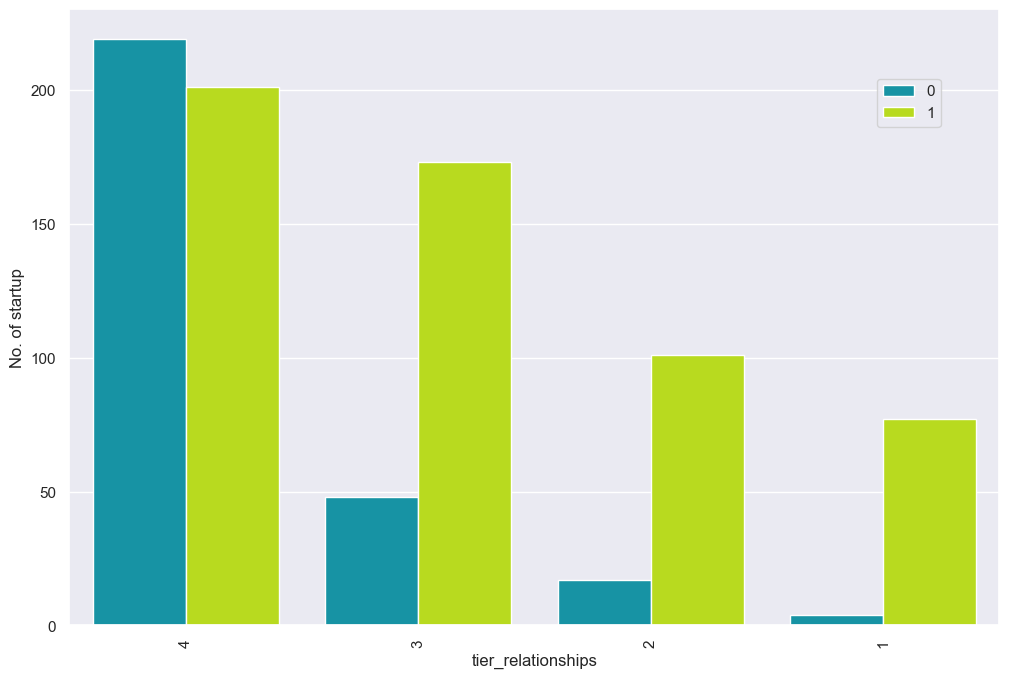

In [462]:
fig, ax = plt.subplots(figsize=(12,8))

_ = sns.countplot(x="tier_relationships", hue="status", data=df, palette="nipy_spectral",
              order=df.tier_relationships.value_counts().index)

_ = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
_ = ax.set(xlabel="tier_relationships", ylabel="No. of startup")
plt.legend(bbox_to_anchor=(0.945, 0.90))

### **Dropping Unnecessary Columns for Model Training**

In [464]:
cols_to_drop = [
    'state_code', 'id', 'category_code', 'object_id', 'zip_code',
    'first_funding_at_day','first_funding_at_month','first_funding_at_year', 'last_funding_at_day','last_funding_at_month','last_funding_at_year', 'city', 'name',
    'Unnamed: 0', 'latitude', 'longitude', 'relationships'
]

df.drop(columns=cols_to_drop, inplace=True)


In [465]:
df.head()

,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,is_MA,is_TX,is_otherstate,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status,founded_at_month,founded_at_day,founded_at_year,closed_at_month,closed_at_day,closed_at_year,has_RoundABCD,has_Investor,has_Seed,invalid_startup,tier_relationships
0,1.178440,1.386969,1.734925,2.041753,3,12.834684,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1.0000,0,1,1,1,2007,0.0,0.0,0.0,0,1,1,0,4
1,1.812542,2.397650,2.080129,2.080129,4,17.506887,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,1,4.7500,1,1,1,1,2000,0.0,0.0,0.0,1,1,0,0,3
2,0.709463,0.709463,0.899145,1.164868,1,14.771022,2,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,4.0000,1,1,3,18,2009,0.0,0.0,0.0,1,0,0,0,4
3,1.418641,1.842944,1.946296,1.946296,3,17.504390,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,3.3333,1,1,1,1,2002,0.0,0.0,0.0,1,0,0,0,4
4,0.000000,0.981517,0.037681,0.037681,2,14.077876,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1.0000,1,0,8,1,2010,10.0,1.0,2012.0,0,1,1,0,4


In [466]:
df.shape

(840, 42)

In [ ]:
df.to_csv("data/cleaned_startup_data.csv", index=False)
